# Prepare scRNA-seq reference for Cell2location:

In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import scipy
import sctk as sk
import seaborn as sb
import scrublet as scr
import matplotlib.pyplot as mpl
from matplotlib.pyplot import rc_context
from glob import glob
import tarfile
import anndata
import warnings

from collections import Counter

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=80, color_map='OrRd')
sc.logging.print_header()


scanpy==1.8.2 anndata==0.8.0 umap==0.5.3 numpy==1.21.1 scipy==1.7.0 pandas==1.5.3 scikit-learn==0.24.2 statsmodels==0.12.2 python-igraph==0.8.3 louvain==0.7.0 leidenalg==0.8.3 pynndescent==0.5.2


.X = raw count;
.obs = original_annotation | anno(harmonised annotation) | Dataset

In [2]:
#chuan's updated h5ad file with the datasets with raw counts (Xu2019, Grenov2022,TabulaMuris, Corbin2020, Drokhlyansky2020):

file= "/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/scRNAseq_reference_for_C2L/Mouse_Gut_for_cell2location_ref_inner_updated.h5ad"

In [13]:
adata_6ds=sc.read(file)

In [14]:
adata_6ds

AnnData object with n_obs × n_vars = 147994 × 14498
    obs: 'original_annotation', 'anno', 'Dataset'

In [5]:
adata_6ds.X

<147994x14498 sparse matrix of type '<class 'numpy.float32'>'
	with 245877132 stored elements in Compressed Sparse Row format>

In [6]:
adata_6ds.X[:10].sum()

27447.0

In [7]:
from scipy.sparse import csr_matrix

In [8]:
csr_matrix.todense(adata_6ds.X)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 2., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [3., 0., 0., ..., 0., 2., 0.]], dtype=float32)

In [9]:
adata_6ds.obs['original_annotation'].value_counts() 

Stem                               12576
B cell                              8746
CD8                                 7843
Resting CD4+ T cells                7194
Plasma cell                         6576
                                   ...  
Ccr7 DC                               29
T precursor-like cell                 18
Lymphatic endothelial-like cell       17
EC.Reg4                                8
D.cells                                5
Name: original_annotation, Length: 121, dtype: int64

In [10]:
adata_6ds.obs['anno'].value_counts()

Stem                               12576
CD8+ T cell                        10183
B cell                              8746
Resting CD4+ T cells                7194
Plasma cell                         6576
                                   ...  
PSVN_3                                34
T precursor-like cell                 18
Lymphatic endothelial-like cell       17
EC.Reg4                                8
D.cells                                5
Name: anno, Length: 103, dtype: int64

In [11]:
adata_6ds.obs['Dataset'].value_counts()

Xu2019              51172
Haber2017           49253
Biton2018           26955
TabulaMuris         10198
Corbin2020           5886
Drokhlyansky2020     4530
Name: Dataset, dtype: int64

In [12]:
# All the datasets included in the celltypist model:
adata_all=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/Mouse_Gut_allDatasets_ref.h5ad')

In [13]:
adata_all

AnnData object with n_obs × n_vars = 171271 × 46145
    obs: 'anno', 'Dataset'
    obsm: 'X_pca', 'X_tsne', 'X_umap'

In [12]:
adata_6ds.var

Empty DataFrame
Columns: []
Index: [0610009B22Rik, 0610009L18Rik, 0610010F05Rik, 0610010K14Rik, 0610012G03Rik, 0610030E20Rik, 0610031O16Rik, 0610038B21Rik, 0610039K10Rik, 0610040B10Rik, 0610040F04Rik, 0610040J01Rik, 0610043K17Rik, 1110002L01Rik, 1110004F10Rik, 1110006O24Rik, 1110008P14Rik, 1110017D15Rik, 1110019D14Rik, 1110020A21Rik, 1110028F18Rik, 1110032A03Rik, 1110032F04Rik, 1110038F14Rik, 1110046J04Rik, 1110051M20Rik, 1110059E24Rik, 1110059G10Rik, 1110065P20Rik, 1190005I06Rik, 1190007I07Rik, 1300002E11Rik, 1300017J02Rik, 1500009C09Rik, 1500009L16Rik, 1500011B03Rik, 1500015A07Rik, 1600002D24Rik, 1600010M07Rik, 1600012H06Rik, 1600014C10Rik, 1600014C23Rik, 1600020E01Rik, 1700001C19Rik, 1700001J03Rik, 1700001L05Rik, 1700001L19Rik, 1700001O22Rik, 1700001P01Rik, 1700003E16Rik, 1700003F12Rik, 1700003M07Rik, 1700007K13Rik, 1700007L15Rik, 1700008J07Rik, 1700008O03Rik, 1700009J07Rik, 1700010I14Rik, 1700012B07Rik, 1700012B09Rik, 1700013D24Rik, 1700013H16Rik, 1700016C15Rik, 1700016D06Rik, 1700016K19Rik, 1700016L21Rik, 1700017B05Rik, 1700017G19Rik, 1700018B08Rik, 1700018L02Rik, 1700019D03Rik, 1700020A23Rik, 1700020L24Rik, 1700020N01Rik, 1700020N18Rik, 1700021N21Rik, 1700022I11Rik, 1700025G04Rik, 1700026D11Rik, 1700027F09Rik, 1700028I16Rik, 1700028J19Rik, 1700028K03Rik, 1700028P14Rik, 1700029I15Rik, 1700029J07Rik, 1700029N11Rik, 1700030J22Rik, 1700030K09Rik, 1700030N03Rik, 1700030O20Rik, 1700034H15Rik, 1700034I23Rik, 1700034P13Rik, 1700037C18Rik, 1700037H04Rik, 1700041M19Rik, 1700042O10Rik, 1700047M11Rik, 1700048O20Rik, ...]

[14498 rows x 0 columns]

# Final annotated object, scRNAseq NicheSeq:

In [15]:
adata_m=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/AllLineages_woDoublets_goodLabels_final.h5ad')

In [16]:
adata_m

AnnData object with n_obs × n_vars = 10831 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_genes_

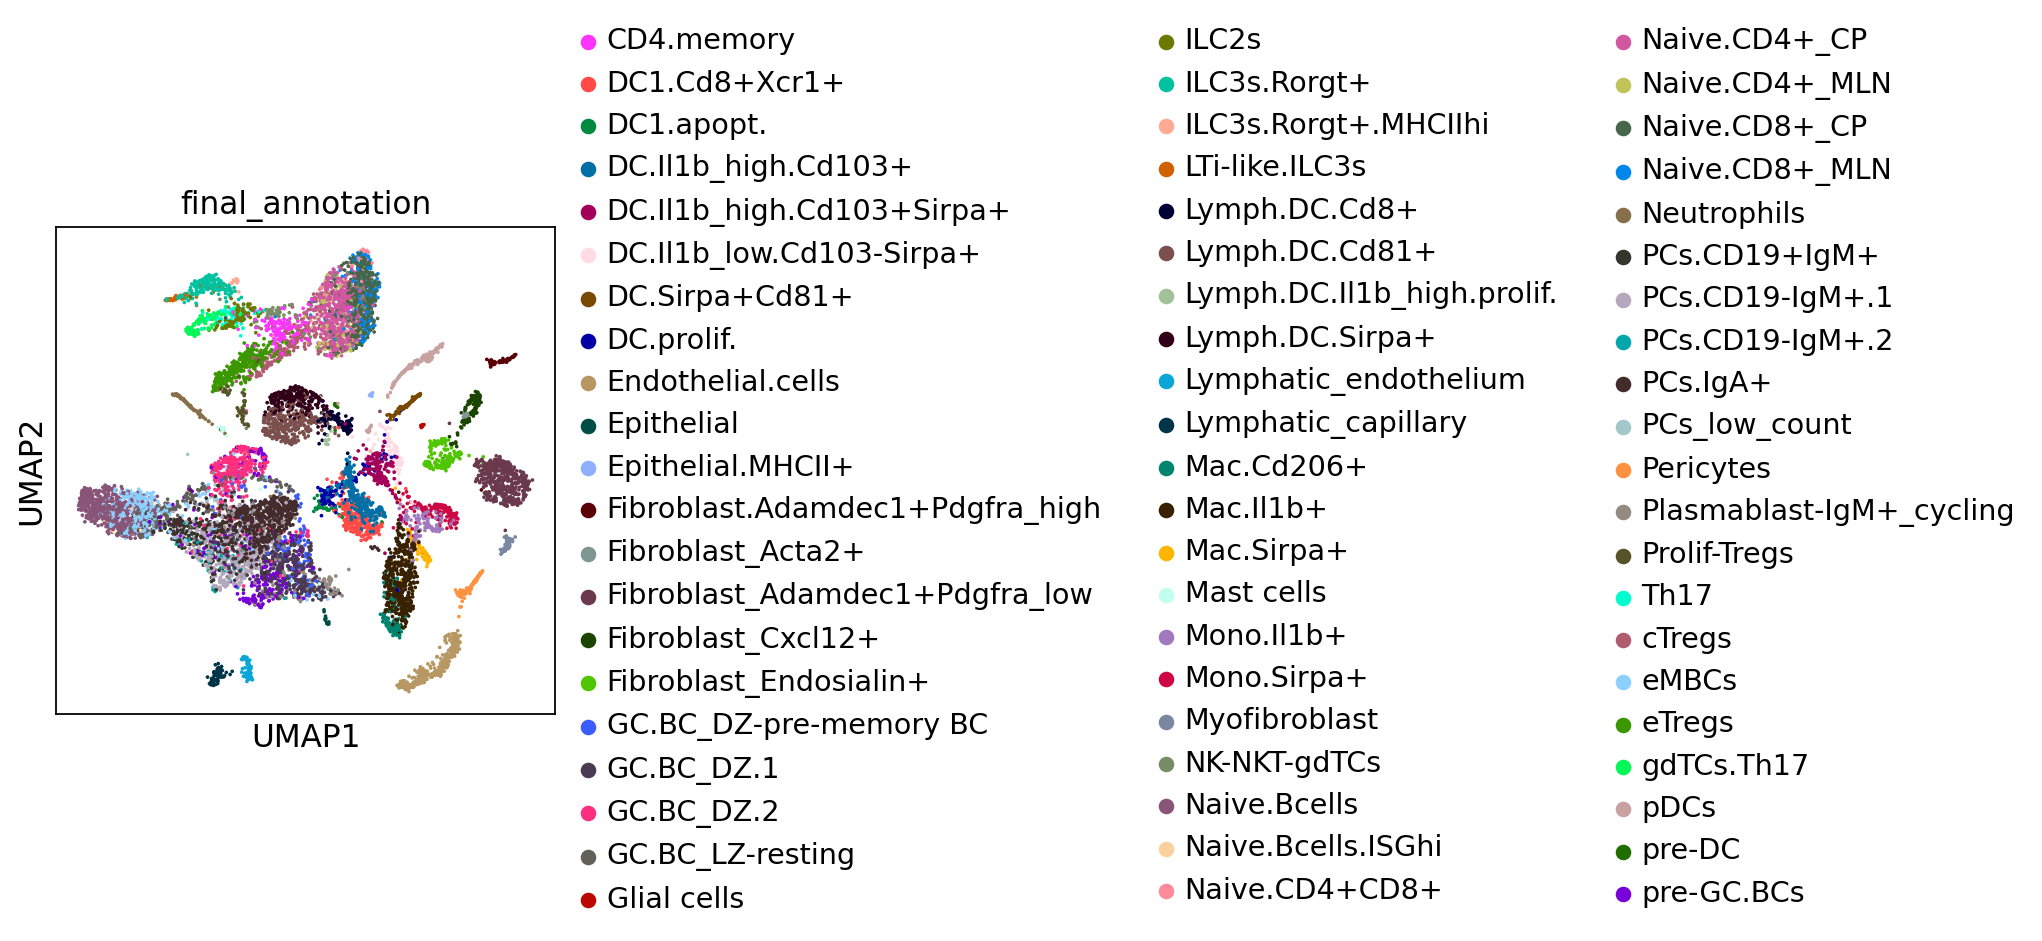

In [17]:
sc.pl.umap(adata_m, color='final_annotation')

# Get raw counts:

In [19]:
#adata_raw=sc.read('/lustre/scratch117/cellgen/team205/rb29/mice-gut.TCRtg/mice4samplesPrepro_vs15June_raw.h5ad')

In [20]:
## Get raw counts from cellranger output:

In [18]:
# define sample metadata. Usually read from a file, here we just define the locations.

samples = {
    "crout1": {"location": "MLN"},
    "crout2": {"location": "CP"},
    "crout3": {"location": "LA"},
    "crout4": {"location": "LP"},
}


In [19]:
adatas_raw = []

for sample, sample_meta in samples.items():
    
    print(sample)
    #sample_num = sample_meta["index"]
    
   #Path to the filtered files:
    adata = sc.read_10x_h5('/warehouse/cellgeni/tic-1097/cellranger/'+sample+'/outs/per_sample_outs/'+sample+'/count/sample_feature_bc_matrix.h5')
    adata.var_names_make_unique()
    
  #add the sample ID at the start of each cell barcode
    #adata.obs_names = [i+'-'+sample_num for i in adata.obs_names]
    
    print(adata.obs_names)
    print(len(adata))
    #add the metadata
    adata.obs["sample"] = sample
    adata.obs["location"] = sample_meta["location"]
    adatas_raw.append(adata)
#Concatenate
adata_raw = adatas_raw[0].concatenate(adatas_raw[1:])

crout1
reading /warehouse/cellgeni/tic-1097/cellranger/crout1/outs/per_sample_outs/crout1/count/sample_feature_bc_matrix.h5
 (0:00:01)
Index(['AAACCTGAGCCCAATT-1', 'AAACCTGAGCCGTCGT-1', 'AAACCTGAGCGTTGCC-1',
       'AAACCTGAGGATTCGG-1', 'AAACCTGAGGTGATTA-1', 'AAACCTGCAACGATGG-1',
       'AAACCTGCACCGAATT-1', 'AAACCTGCATGGTTGT-1', 'AAACCTGGTAAGGGAA-1',
       'AAACCTGGTACCGGCT-1',
       ...
       'TTTGTCAAGTGTACTC-1', 'TTTGTCACAACACCCG-1', 'TTTGTCACAGATAATG-1',
       'TTTGTCACAGCATACT-1', 'TTTGTCAGTACAAGTA-1', 'TTTGTCAGTTGTTTGG-1',
       'TTTGTCAGTTTCCACC-1', 'TTTGTCATCAGCATGT-1', 'TTTGTCATCAGTCAGT-1',
       'TTTGTCATCGTACGGC-1'],
      dtype='object', length=8710)
8710
crout2
reading /warehouse/cellgeni/tic-1097/cellranger/crout2/outs/per_sample_outs/crout2/count/sample_feature_bc_matrix.h5
 (0:00:00)
Index(['AAACCTGAGCAGGTCA-1', 'AAACCTGAGGGATACC-1', 'AAACCTGCAATAAGCA-1',
       'AAACCTGCAGTAGAGC-1', 'AAACCTGCATAACCTG-1', 'AAACCTGCATGACATC-1',
       'AAACCTGCATTATCTC-1', 'AAACCT

In [20]:
adata_raw

AnnData object with n_obs × n_vars = 17239 × 32285
    obs: 'sample', 'location', 'batch'
    var: 'gene_ids', 'feature_types', 'genome'

In [21]:
sc.pp.filter_genes(adata_raw, min_cells = 3)

filtered out 12955 genes that are detected in less than 3 cells


In [22]:
adata_raw.obs_names

Index(['AAACCTGAGCCCAATT-1-0', 'AAACCTGAGCCGTCGT-1-0', 'AAACCTGAGCGTTGCC-1-0',
       'AAACCTGAGGATTCGG-1-0', 'AAACCTGAGGTGATTA-1-0', 'AAACCTGCAACGATGG-1-0',
       'AAACCTGCACCGAATT-1-0', 'AAACCTGCATGGTTGT-1-0', 'AAACCTGGTAAGGGAA-1-0',
       'AAACCTGGTACCGGCT-1-0',
       ...
       'TTTGGTTGTGGTAACG-1-3', 'TTTGGTTTCATGCATG-1-3', 'TTTGTCAAGATATGCA-1-3',
       'TTTGTCAAGGCAATTA-1-3', 'TTTGTCACAGTTTACG-1-3', 'TTTGTCACATGACGGA-1-3',
       'TTTGTCAGTCAATGTC-1-3', 'TTTGTCATCAACACCA-1-3', 'TTTGTCATCCGCGGTA-1-3',
       'TTTGTCATCTCGCATC-1-3'],
      dtype='object', length=17239)

## Filtered object with raw data:

In [23]:
raw=adata_raw[adata_raw.obs_names.isin(adata_m.obs_names)]

In [24]:
adata_m.obs_names

Index(['AAACCTGAGCCCAATT-1-0', 'AAACCTGAGCGTTGCC-1-0', 'AAACCTGAGGTGATTA-1-0',
       'AAACCTGCAACGATGG-1-0', 'AAACCTGCATGGTTGT-1-0', 'AAACCTGGTACCGGCT-1-0',
       'AAACCTGGTACCTACA-1-0', 'AAACCTGGTCGAGATG-1-0', 'AAACCTGGTGAACCTT-1-0',
       'AAACCTGGTGCTTCTC-1-0',
       ...
       'TTTGCGCCATTCCTGC-1-3', 'TTTGCGCGTCCGTTAA-1-3', 'TTTGGTTCACGGTAAG-1-3',
       'TTTGGTTTCATGCATG-1-3', 'TTTGTCAAGATATGCA-1-3', 'TTTGTCAAGGCAATTA-1-3',
       'TTTGTCACATGACGGA-1-3', 'TTTGTCAGTCAATGTC-1-3', 'TTTGTCATCAACACCA-1-3',
       'TTTGTCATCCGCGGTA-1-3'],
      dtype='object', length=10831)

In [25]:
raw.obs

sample location batch
AAACCTGAGCCCAATT-1-0  crout1      MLN     0
AAACCTGAGCGTTGCC-1-0  crout1      MLN     0
AAACCTGAGGTGATTA-1-0  crout1      MLN     0
AAACCTGCAACGATGG-1-0  crout1      MLN     0
AAACCTGCATGGTTGT-1-0  crout1      MLN     0
...                      ...      ...   ...
TTTGTCAAGGCAATTA-1-3  crout4       LP     3
TTTGTCACATGACGGA-1-3  crout4       LP     3
TTTGTCAGTCAATGTC-1-3  crout4       LP     3
TTTGTCATCAACACCA-1-3  crout4       LP     3
TTTGTCATCCGCGGTA-1-3  crout4       LP     3

[10831 rows x 3 columns]

In [26]:
raw.obs = raw.obs.reindex(adata_m.obs.index)

In [27]:
raw.obs_names

Index(['AAACCTGAGCCCAATT-1-0', 'AAACCTGAGCGTTGCC-1-0', 'AAACCTGAGGTGATTA-1-0',
       'AAACCTGCAACGATGG-1-0', 'AAACCTGCATGGTTGT-1-0', 'AAACCTGGTACCGGCT-1-0',
       'AAACCTGGTACCTACA-1-0', 'AAACCTGGTCGAGATG-1-0', 'AAACCTGGTGAACCTT-1-0',
       'AAACCTGGTGCTTCTC-1-0',
       ...
       'TTTGCGCCATTCCTGC-1-3', 'TTTGCGCGTCCGTTAA-1-3', 'TTTGGTTCACGGTAAG-1-3',
       'TTTGGTTTCATGCATG-1-3', 'TTTGTCAAGATATGCA-1-3', 'TTTGTCAAGGCAATTA-1-3',
       'TTTGTCACATGACGGA-1-3', 'TTTGTCAGTCAATGTC-1-3', 'TTTGTCATCAACACCA-1-3',
       'TTTGTCATCCGCGGTA-1-3'],
      dtype='object', length=10831)

In [28]:
adata_m.obs_names

Index(['AAACCTGAGCCCAATT-1-0', 'AAACCTGAGCGTTGCC-1-0', 'AAACCTGAGGTGATTA-1-0',
       'AAACCTGCAACGATGG-1-0', 'AAACCTGCATGGTTGT-1-0', 'AAACCTGGTACCGGCT-1-0',
       'AAACCTGGTACCTACA-1-0', 'AAACCTGGTCGAGATG-1-0', 'AAACCTGGTGAACCTT-1-0',
       'AAACCTGGTGCTTCTC-1-0',
       ...
       'TTTGCGCCATTCCTGC-1-3', 'TTTGCGCGTCCGTTAA-1-3', 'TTTGGTTCACGGTAAG-1-3',
       'TTTGGTTTCATGCATG-1-3', 'TTTGTCAAGATATGCA-1-3', 'TTTGTCAAGGCAATTA-1-3',
       'TTTGTCACATGACGGA-1-3', 'TTTGTCAGTCAATGTC-1-3', 'TTTGTCATCAACACCA-1-3',
       'TTTGTCATCCGCGGTA-1-3'],
      dtype='object', length=10831)

In [29]:
adata_m

AnnData object with n_obs × n_vars = 10831 × 2001
    obs: 'IR_VJ_1_locus', 'IR_VJ_2_locus', 'IR_VDJ_1_locus', 'IR_VDJ_2_locus', 'IR_VJ_1_cdr3', 'IR_VJ_2_cdr3', 'IR_VDJ_1_cdr3', 'IR_VDJ_2_cdr3', 'IR_VJ_1_cdr3_nt', 'IR_VJ_2_cdr3_nt', 'IR_VDJ_1_cdr3_nt', 'IR_VDJ_2_cdr3_nt', 'IR_VJ_1_expr', 'IR_VJ_2_expr', 'IR_VDJ_1_expr', 'IR_VDJ_2_expr', 'IR_VJ_1_expr_raw', 'IR_VJ_2_expr_raw', 'IR_VDJ_1_expr_raw', 'IR_VDJ_2_expr_raw', 'IR_VJ_1_v_gene', 'IR_VJ_2_v_gene', 'IR_VDJ_1_v_gene', 'IR_VDJ_2_v_gene', 'IR_VJ_1_d_gene', 'IR_VJ_2_d_gene', 'IR_VDJ_1_d_gene', 'IR_VDJ_2_d_gene', 'IR_VJ_1_j_gene', 'IR_VJ_2_j_gene', 'IR_VDJ_1_j_gene', 'IR_VDJ_2_j_gene', 'IR_VJ_1_c_gene', 'IR_VJ_2_c_gene', 'IR_VDJ_1_c_gene', 'IR_VDJ_2_c_gene', 'IR_VJ_1_junction_ins', 'IR_VJ_2_junction_ins', 'IR_VDJ_1_junction_ins', 'IR_VDJ_2_junction_ins', 'has_ir', 'multi_chain', 'sample', 'location', 'batch', 'scrublet_score', 'scrublet_leiden', 'cluster_scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'predicted_doublets', 'n_genes_

In [30]:
adata_m.X

array([[-1.4041232e-01, -1.7029198e-01, -1.9239417e-01, ...,
        -3.5806316e-01, -1.6883759e-01, -2.4446289e-01],
       [-1.6748904e-01, -1.9100223e-01, -1.7454973e-01, ...,
        -3.2236004e-01, -1.7285380e-01, -2.0020323e-01],
       [-1.5723804e-03, -1.2842190e-02, -5.4882526e-02, ...,
        -1.0207746e-01, -3.7934266e-02, -8.8256784e-02],
       ...,
       [-2.0847940e-01, -2.4272332e-01, -2.1842635e-01, ...,
         3.8544350e+00, -2.0790194e-01, -2.4181356e-01],
       [ 8.9055157e+00, -2.2824621e-01, -1.8470320e-01, ...,
        -3.2315895e-01, -1.8821467e-01, -1.9132829e-01],
       [-2.0386899e-01, -2.2362314e-01, -1.6789025e-01, ...,
        -2.9931927e-01, -1.8224218e-01, -1.6669519e-01]], dtype=float32)

In [31]:
raw

AnnData object with n_obs × n_vars = 10831 × 19330
    obs: 'sample', 'location', 'batch'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [32]:
raw.X

<10831x19330 sparse matrix of type '<class 'numpy.float32'>'
	with 17500284 stored elements in Compressed Sparse Row format>

In [33]:
from scipy.sparse import csr_matrix

In [34]:
csr_matrix.todense(raw.X)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 2.],
        [2., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
raw.X[:10].sum()

66308.0

In [39]:
# Add metadata

In [36]:
raw.obs = raw.obs.join(pd.read_csv("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Annotations/final_annot_withDoublets.csv", index_col=0), lsuffix="_ori" )

In [37]:
raw.obs

sample location batch                final_annotation
AAACCTGAGCCCAATT-1-0  crout1      MLN     0                GC.BC_LZ-resting
AAACCTGAGCGTTGCC-1-0  crout1      MLN     0                 Lymph.DC.Sirpa+
AAACCTGAGGTGATTA-1-0  crout1      MLN     0                 PCs.CD19-IgM+.2
AAACCTGCAACGATGG-1-0  crout1      MLN     0                          cTregs
AAACCTGCATGGTTGT-1-0  crout1      MLN     0                   PCs.CD19+IgM+
...                      ...      ...   ...                             ...
TTTGTCAAGGCAATTA-1-3  crout4       LP     3               Endothelial.cells
TTTGTCACATGACGGA-1-3  crout4       LP     3                      Mac.Cd206+
TTTGTCAGTCAATGTC-1-3  crout4       LP     3  Fibroblast_Adamdec1+Pdgfra_low
TTTGTCATCAACACCA-1-3  crout4       LP     3               Endothelial.cells
TTTGTCATCCGCGGTA-1-3  crout4       LP     3                          eTregs

[10831 rows x 4 columns]

In [38]:
raw

AnnData object with n_obs × n_vars = 10831 × 19330
    obs: 'sample', 'location', 'batch', 'final_annotation'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [39]:
from scipy.sparse import csr_matrix

In [40]:
csr_matrix.todense(raw.X)

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 2.],
        [2., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
raw.X[:10].sum()

66308.0

In [42]:
raw.obs

sample location batch                final_annotation
AAACCTGAGCCCAATT-1-0  crout1      MLN     0                GC.BC_LZ-resting
AAACCTGAGCGTTGCC-1-0  crout1      MLN     0                 Lymph.DC.Sirpa+
AAACCTGAGGTGATTA-1-0  crout1      MLN     0                 PCs.CD19-IgM+.2
AAACCTGCAACGATGG-1-0  crout1      MLN     0                          cTregs
AAACCTGCATGGTTGT-1-0  crout1      MLN     0                   PCs.CD19+IgM+
...                      ...      ...   ...                             ...
TTTGTCAAGGCAATTA-1-3  crout4       LP     3               Endothelial.cells
TTTGTCACATGACGGA-1-3  crout4       LP     3                      Mac.Cd206+
TTTGTCAGTCAATGTC-1-3  crout4       LP     3  Fibroblast_Adamdec1+Pdgfra_low
TTTGTCATCAACACCA-1-3  crout4       LP     3               Endothelial.cells
TTTGTCATCCGCGGTA-1-3  crout4       LP     3                          eTregs

[10831 rows x 4 columns]

In [43]:
raw.obs = raw.obs.filter(['final_annotation'])

In [44]:
raw.obs.rename({'final_annotation':'final_annotation_2'}, axis=1, inplace=True)

In [45]:
raw.obs = raw.obs.join(pd.read_csv("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Meta_Final_annotation_lineage_location_tgTCR.csv", index_col=0))

In [46]:
raw.obs

final_annotation_2  \
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                          cTregs   
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+   
...                                              ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low   
TTTGTCATCAACACCA-1-3               Endothelial.cells   
TTTGTCATCCGCGGTA-1-3                          eTregs   

                                    final_annotation   lineage_new location  \
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting         B-PCs      MLN   
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+       Myeloid      MLN   
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2         B-PCs      MLN   
AAACCTGCAACGATGG-1-0                          cTregs  ILCs-T.cells      MLN   
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+         B-PCs      MLN   
...                                              ...           ...      ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells   Endothelial       LP   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+       Myeloid       LP   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low   Mesenchymal       LP   
TTTGTCATCAACACCA-1-3               Endothelial.cells   Endothelial       LP   
TTTGTCATCCGCGGTA-1-3                          eTregs  ILCs-T.cells       LP   

                      tag  
AAACCTGAGCCCAATT-1-0  NaN  
AAACCTGAGCGTTGCC-1-0  NaN  
AAACCTGAGGTGATTA-1-0  NaN  
AAACCTGCAACGATGG-1-0  NaN  
AAACCTGCATGGTTGT-1-0  NaN  
...                   ...  
TTTGTCAAGGCAATTA-1-3  NaN  
TTTGTCACATGACGGA-1-3  NaN  
TTTGTCAGTCAATGTC-1-3  NaN  
TTTGTCATCAACACCA-1-3  NaN  
TTTGTCATCCGCGGTA-1-3  NaN  

[10831 rows x 5 columns]

In [47]:
raw.obs["Dataset"]="NicheSeq"

In [48]:
raw.obs

final_annotation_2  \
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                          cTregs   
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+   
...                                              ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low   
TTTGTCATCAACACCA-1-3               Endothelial.cells   
TTTGTCATCCGCGGTA-1-3                          eTregs   

                                    final_annotation   lineage_new location  \
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting         B-PCs      MLN   
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+       Myeloid      MLN   
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2         B-PCs      MLN   
AAACCTGCAACGATGG-1-0                          cTregs  ILCs-T.cells      MLN   
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+         B-PCs      MLN   
...                                              ...           ...      ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells   Endothelial       LP   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+       Myeloid       LP   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low   Mesenchymal       LP   
TTTGTCATCAACACCA-1-3               Endothelial.cells   Endothelial       LP   
TTTGTCATCCGCGGTA-1-3                          eTregs  ILCs-T.cells       LP   

                      tag   Dataset  
AAACCTGAGCCCAATT-1-0  NaN  NicheSeq  
AAACCTGAGCGTTGCC-1-0  NaN  NicheSeq  
AAACCTGAGGTGATTA-1-0  NaN  NicheSeq  
AAACCTGCAACGATGG-1-0  NaN  NicheSeq  
AAACCTGCATGGTTGT-1-0  NaN  NicheSeq  
...                   ...       ...  
TTTGTCAAGGCAATTA-1-3  NaN  NicheSeq  
TTTGTCACATGACGGA-1-3  NaN  NicheSeq  
TTTGTCAGTCAATGTC-1-3  NaN  NicheSeq  
TTTGTCATCAACACCA-1-3  NaN  NicheSeq  
TTTGTCATCCGCGGTA-1-3  NaN  NicheSeq  

[10831 rows x 6 columns]

In [51]:
raw.obs["cellsubset_tgTCR"] = np.where(raw.obs['tag']=="tgTCR", raw.obs.astype(str)["final_annotation"] +'_'+ raw.obs.astype(str)["tag"],raw.obs['final_annotation'])

In [52]:
raw.obs['cellsubset_tgTCR'].value_counts()

Naive.Bcells                      645
PCs.CD19-IgM+.1                   574
PCs.IgA+                          535
Naive.CD4+_CP                     473
Fibroblast_Adamdec1+Pdgfra_low    466
                                 ... 
Glial cells                        10
Epithelial.MHCII+                   7
Fibroblast_Acta2+                   6
cTregs_tgTCR                        5
Prolif-Tregs_tgTCR                  2
Name: cellsubset_tgTCR, Length: 66, dtype: int64

In [53]:
raw.obs['original_annotation']= raw.obs.astype(str)["cellsubset_tgTCR"] +'_'+ raw.obs.astype(str)["location"]

In [54]:
raw.obs['original_annotation'].value_counts()

PCs.IgA+_LP                           499
Naive.Bcells_MLN                      476
PCs.CD19-IgM+.1_MLN                   447
Naive.CD4+_CP_CP                      436
Fibroblast_Adamdec1+Pdgfra_low_LP     377
                                     ... 
PCs.CD19-IgM+.1_LA                      1
Pericytes_LA                            1
Naive.CD4+CD8+_LA                       1
Fibroblast.Adamdec1+Pdgfra_high_LA      1
cTregs_LP                               1
Name: original_annotation, Length: 191, dtype: int64

In [55]:
raw.obs

final_annotation_2  \
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                          cTregs   
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+   
...                                              ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low   
TTTGTCATCAACACCA-1-3               Endothelial.cells   
TTTGTCATCCGCGGTA-1-3                          eTregs   

                                    final_annotation   lineage_new location  \
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting         B-PCs      MLN   
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+       Myeloid      MLN   
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2         B-PCs      MLN   
AAACCTGCAACGATGG-1-0                          cTregs  ILCs-T.cells      MLN   
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+         B-PCs      MLN   
...                                              ...           ...      ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells   Endothelial       LP   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+       Myeloid       LP   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low   Mesenchymal       LP   
TTTGTCATCAACACCA-1-3               Endothelial.cells   Endothelial       LP   
TTTGTCATCCGCGGTA-1-3                          eTregs  ILCs-T.cells       LP   

                      tag   Dataset                cellsubset_tgTCR  \
AAACCTGAGCCCAATT-1-0  NaN  NicheSeq                GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0  NaN  NicheSeq                 Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0  NaN  NicheSeq                 PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0  NaN  NicheSeq                          cTregs   
AAACCTGCATGGTTGT-1-0  NaN  NicheSeq                   PCs.CD19+IgM+   
...                   ...       ...                             ...   
TTTGTCAAGGCAATTA-1-3  NaN  NicheSeq               Endothelial.cells   
TTTGTCACATGACGGA-1-3  NaN  NicheSeq                      Mac.Cd206+   
TTTGTCAGTCAATGTC-1-3  NaN  NicheSeq  Fibroblast_Adamdec1+Pdgfra_low   
TTTGTCATCAACACCA-1-3  NaN  NicheSeq               Endothelial.cells   
TTTGTCATCCGCGGTA-1-3  NaN  NicheSeq                          eTregs   

                                    original_annotation  
AAACCTGAGCCCAATT-1-0               GC.BC_LZ-resting_MLN  
AAACCTGAGCGTTGCC-1-0                Lymph.DC.Sirpa+_MLN  
AAACCTGAGGTGATTA-1-0                PCs.CD19-IgM+.2_MLN  
AAACCTGCAACGATGG-1-0                         cTregs_MLN  
AAACCTGCATGGTTGT-1-0                  PCs.CD19+IgM+_MLN  
...                                                 ...  
TTTGTCAAGGCAATTA-1-3               Endothelial.cells_LP  
TTTGTCACATGACGGA-1-3                      Mac.Cd206+_LP  
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low_LP  
TTTGTCATCAACACCA-1-3               Endothelial.cells_LP  
TTTGTCATCCGCGGTA-1-3                          eTregs_LP  

[10831 rows x 8 columns]

In [56]:
raw.obs = raw.obs.filter(['original_annotation','final_annotation','Dataset'])

In [57]:
raw.obs.rename({'final_annotation':'anno'}, axis=1, inplace=True)

In [58]:
raw.obs

original_annotation  \
AAACCTGAGCCCAATT-1-0               GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                         cTregs_MLN   
AAACCTGCATGGTTGT-1-0                  PCs.CD19+IgM+_MLN   
...                                                 ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells_LP   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+_LP   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low_LP   
TTTGTCATCAACACCA-1-3               Endothelial.cells_LP   
TTTGTCATCCGCGGTA-1-3                          eTregs_LP   

                                                anno   Dataset  
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting  NicheSeq  
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+  NicheSeq  
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2  NicheSeq  
AAACCTGCAACGATGG-1-0                          cTregs  NicheSeq  
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+  NicheSeq  
...                                              ...       ...  
TTTGTCAAGGCAATTA-1-3               Endothelial.cells  NicheSeq  
TTTGTCACATGACGGA-1-3                      Mac.Cd206+  NicheSeq  
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low  NicheSeq  
TTTGTCATCAACACCA-1-3               Endothelial.cells  NicheSeq  
TTTGTCATCCGCGGTA-1-3                          eTregs  NicheSeq  

[10831 rows x 3 columns]

In [59]:
adata_6ds.obs

original_annotation  \
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGCA...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGTC...  Resting CD4+ T cells   
...                                                                  ...   
epi4.WT_TTGTACACCCGCTT_Stem.TA-Haber2017                         Stem.TA   
epi4.WT_TTGTAGCTATGCCA_Tuft-Haber2017                               Tuft   
epi4.WT_TTTAGAGATTTACC_Stem.TA-Haber2017                         Stem.TA   
epi4.WT_TTTCTACTAGACTC_Tuft-Haber2017                               Tuft   
epi4.WT_TTTGACTGCCGAAT_Tuft-Haber2017                               Tuft   

                                                                    anno  \
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGCA...  Resting CD4+ T cells   
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGTC...  Resting CD4+ T cells   
...                                                                  ...   
epi4.WT_TTGTACACCCGCTT_Stem.TA-Haber2017                         Stem.TA   
epi4.WT_TTGTAGCTATGCCA_Tuft-Haber2017                               Tuft   
epi4.WT_TTTAGAGATTTACC_Stem.TA-Haber2017                         Stem.TA   
epi4.WT_TTTCTACTAGACTC_Tuft-Haber2017                               Tuft   
epi4.WT_TTTGACTGCCGAAT_Tuft-Haber2017                               Tuft   

                                                      Dataset  
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...     Xu2019  
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...     Xu2019  
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGAG...     Xu2019  
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGCA...     Xu2019  
04242017_PP_location_WT_Allergy_v2_AI_AAACCTGTC...     Xu2019  
...                                                       ...  
epi4.WT_TTGTACACCCGCTT_Stem.TA-Haber2017            Haber2017  
epi4.WT_TTGTAGCTATGCCA_Tuft-Haber2017               Haber2017  
epi4.WT_TTTAGAGATTTACC_Stem.TA-Haber2017            Haber2017  
epi4.WT_TTTCTACTAGACTC_Tuft-Haber2017               Haber2017  
epi4.WT_TTTGACTGCCGAAT_Tuft-Haber2017               Haber2017  

[147994 rows x 3 columns]

In [ ]:
## Save raw counts file

In [60]:
raw.write("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/global_object_rawcounts.h5ad")

# Merge both objects for the Cell2location reference:

In [ ]:
#### Important to use by default is join="inner" (by default is "inner") 
#to keep the genes that are common aomng the datasets

#https://github.com/scverse/anndata/issues/390

In [3]:
raw=sc.read("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/global_object_rawcounts.h5ad")

In [4]:
raw.obs

original_annotation  \
AAACCTGAGCCCAATT-1-0               GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                         cTregs_MLN   
AAACCTGCATGGTTGT-1-0                  PCs.CD19+IgM+_MLN   
...                                                 ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells_LP   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+_LP   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low_LP   
TTTGTCATCAACACCA-1-3               Endothelial.cells_LP   
TTTGTCATCCGCGGTA-1-3                          eTregs_LP   

                                                anno   Dataset  
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting  NicheSeq  
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+  NicheSeq  
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2  NicheSeq  
AAACCTGCAACGATGG-1-0                          cTregs  NicheSeq  
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+  NicheSeq  
...                                              ...       ...  
TTTGTCAAGGCAATTA-1-3               Endothelial.cells  NicheSeq  
TTTGTCACATGACGGA-1-3                      Mac.Cd206+  NicheSeq  
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low  NicheSeq  
TTTGTCATCAACACCA-1-3               Endothelial.cells  NicheSeq  
TTTGTCATCCGCGGTA-1-3                          eTregs  NicheSeq  

[10831 rows x 3 columns]

<AxesSubplot:>

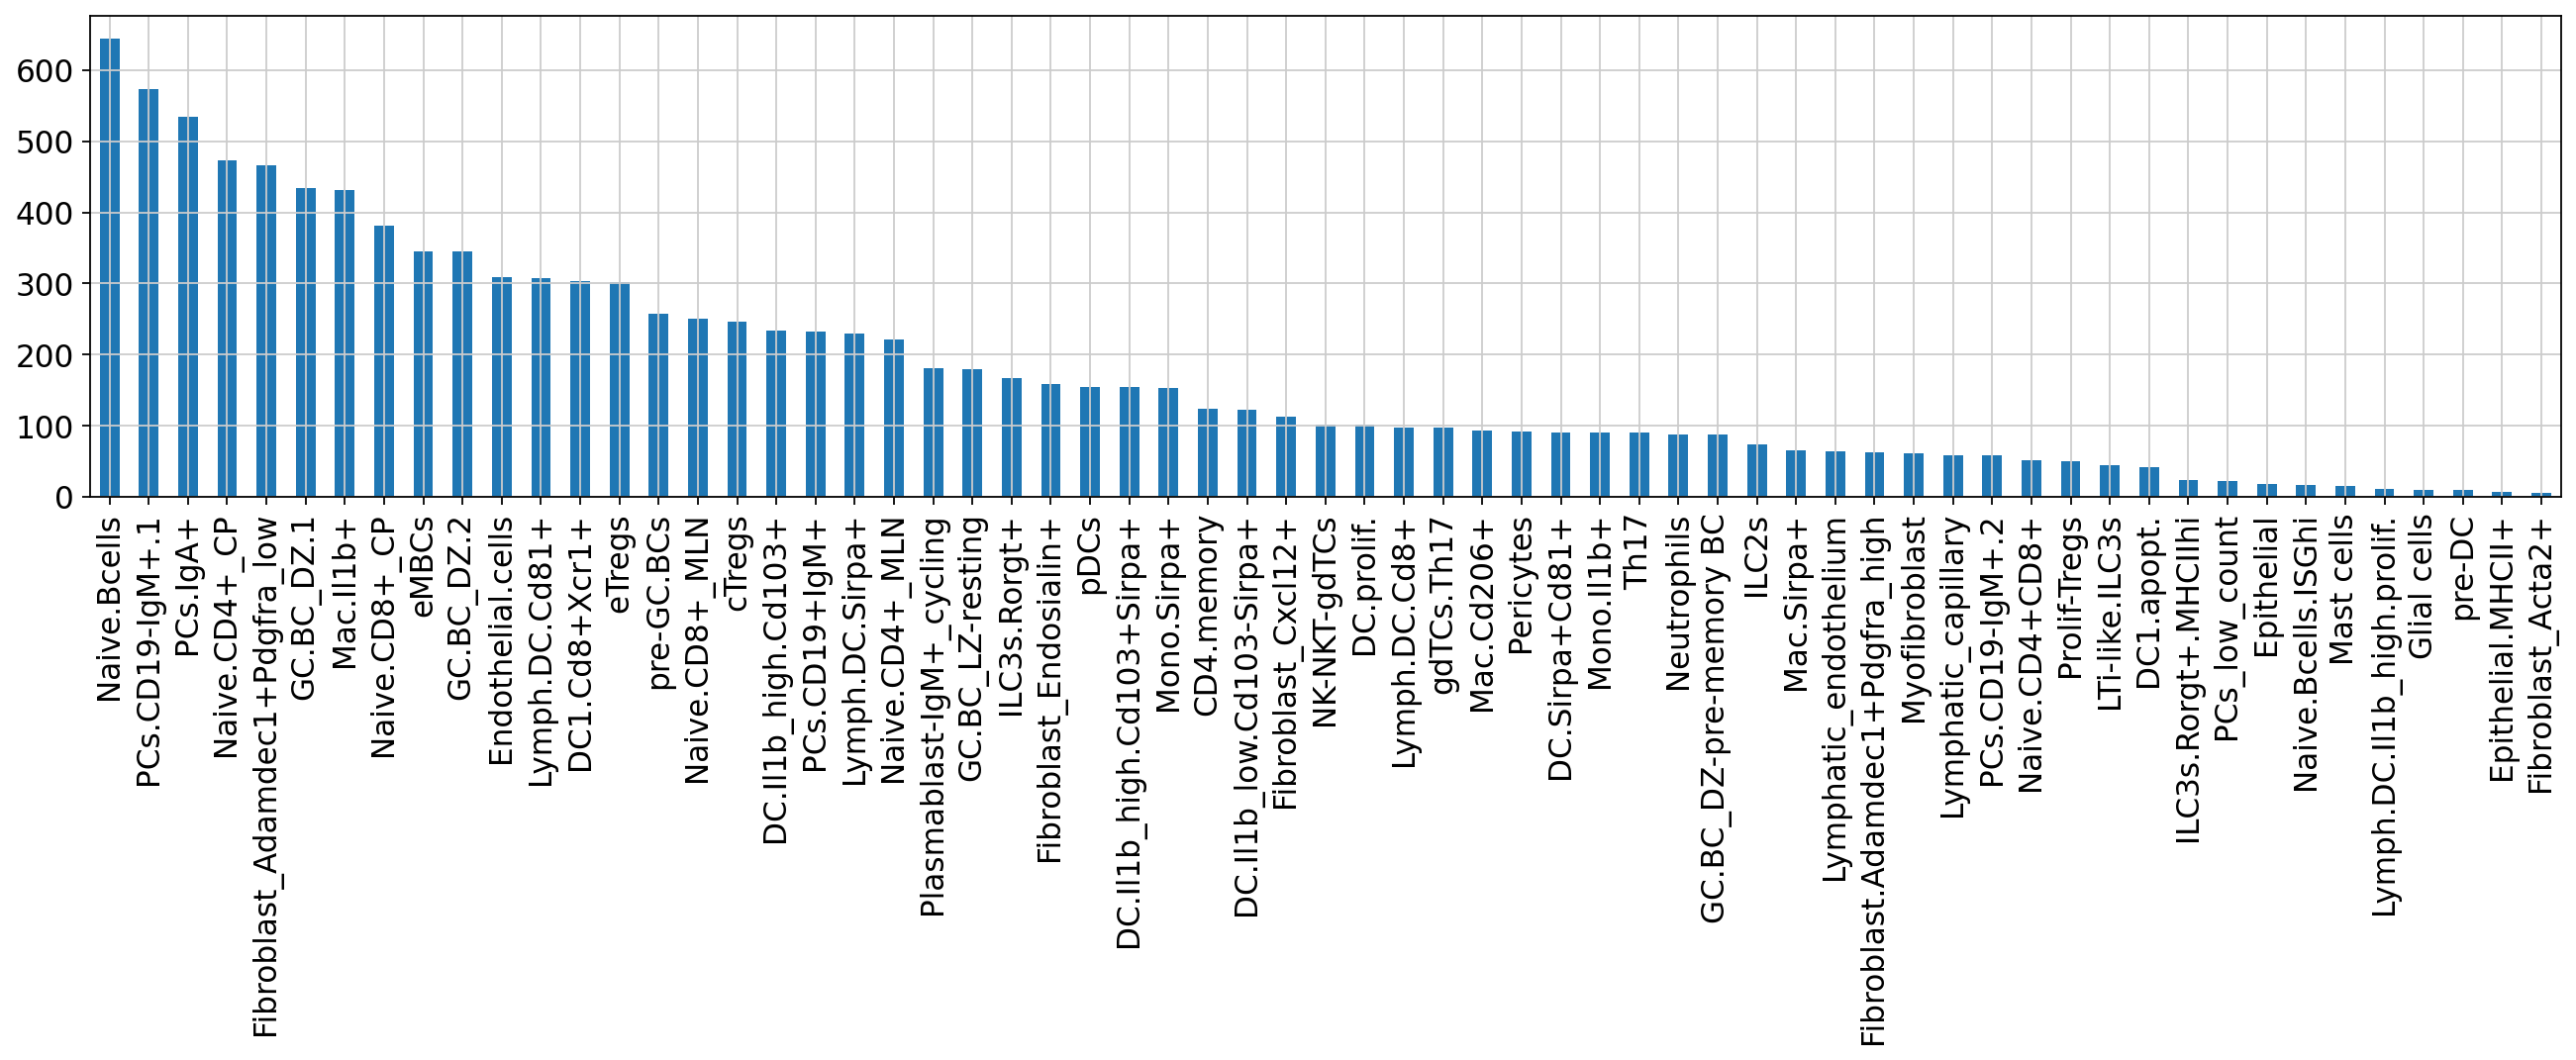

In [5]:
raw.obs['anno'].value_counts().plot(kind='bar', figsize=(20,4))

In [6]:
cells_remove=['DC1.apopt.','PCs_low_count','pre-DC']

In [7]:
nicheSeq=raw[~raw.obs["anno"].isin(cells_remove)]

In [8]:
nicheSeq

View of AnnData object with n_obs × n_vars = 10757 × 19330
    obs: 'original_annotation', 'anno', 'Dataset'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [9]:
def label_harm (row):

    if row['anno'] in [ 'Naive.CD4+_CP','Naive.CD4+_MLN']:
        return 'Naive.CD4+TCs'
    if row['anno'] in ['Naive.CD8+_CP', 'Naive.CD8+_MLN']:
        return 'Naive.CD8+TCs'
    if row['anno'] in ["PCs.CD19-IgM+.1", 'PCs.CD19-IgM+.2',"PCs.CD19+IgM+"]:
        return 'PCs.IgM+'
    if row['anno'] in ['GC.BC_DZ.1','GC.BC_DZ.2','GC.BC_LZ','GC.BC_LZ-resting']:
        return 'GC_B.cell'
    else :
        return row['anno']


In [10]:
nicheSeq.obs['anno'] = nicheSeq.obs.apply(lambda row: label_harm (row), axis=1)

<AxesSubplot:>

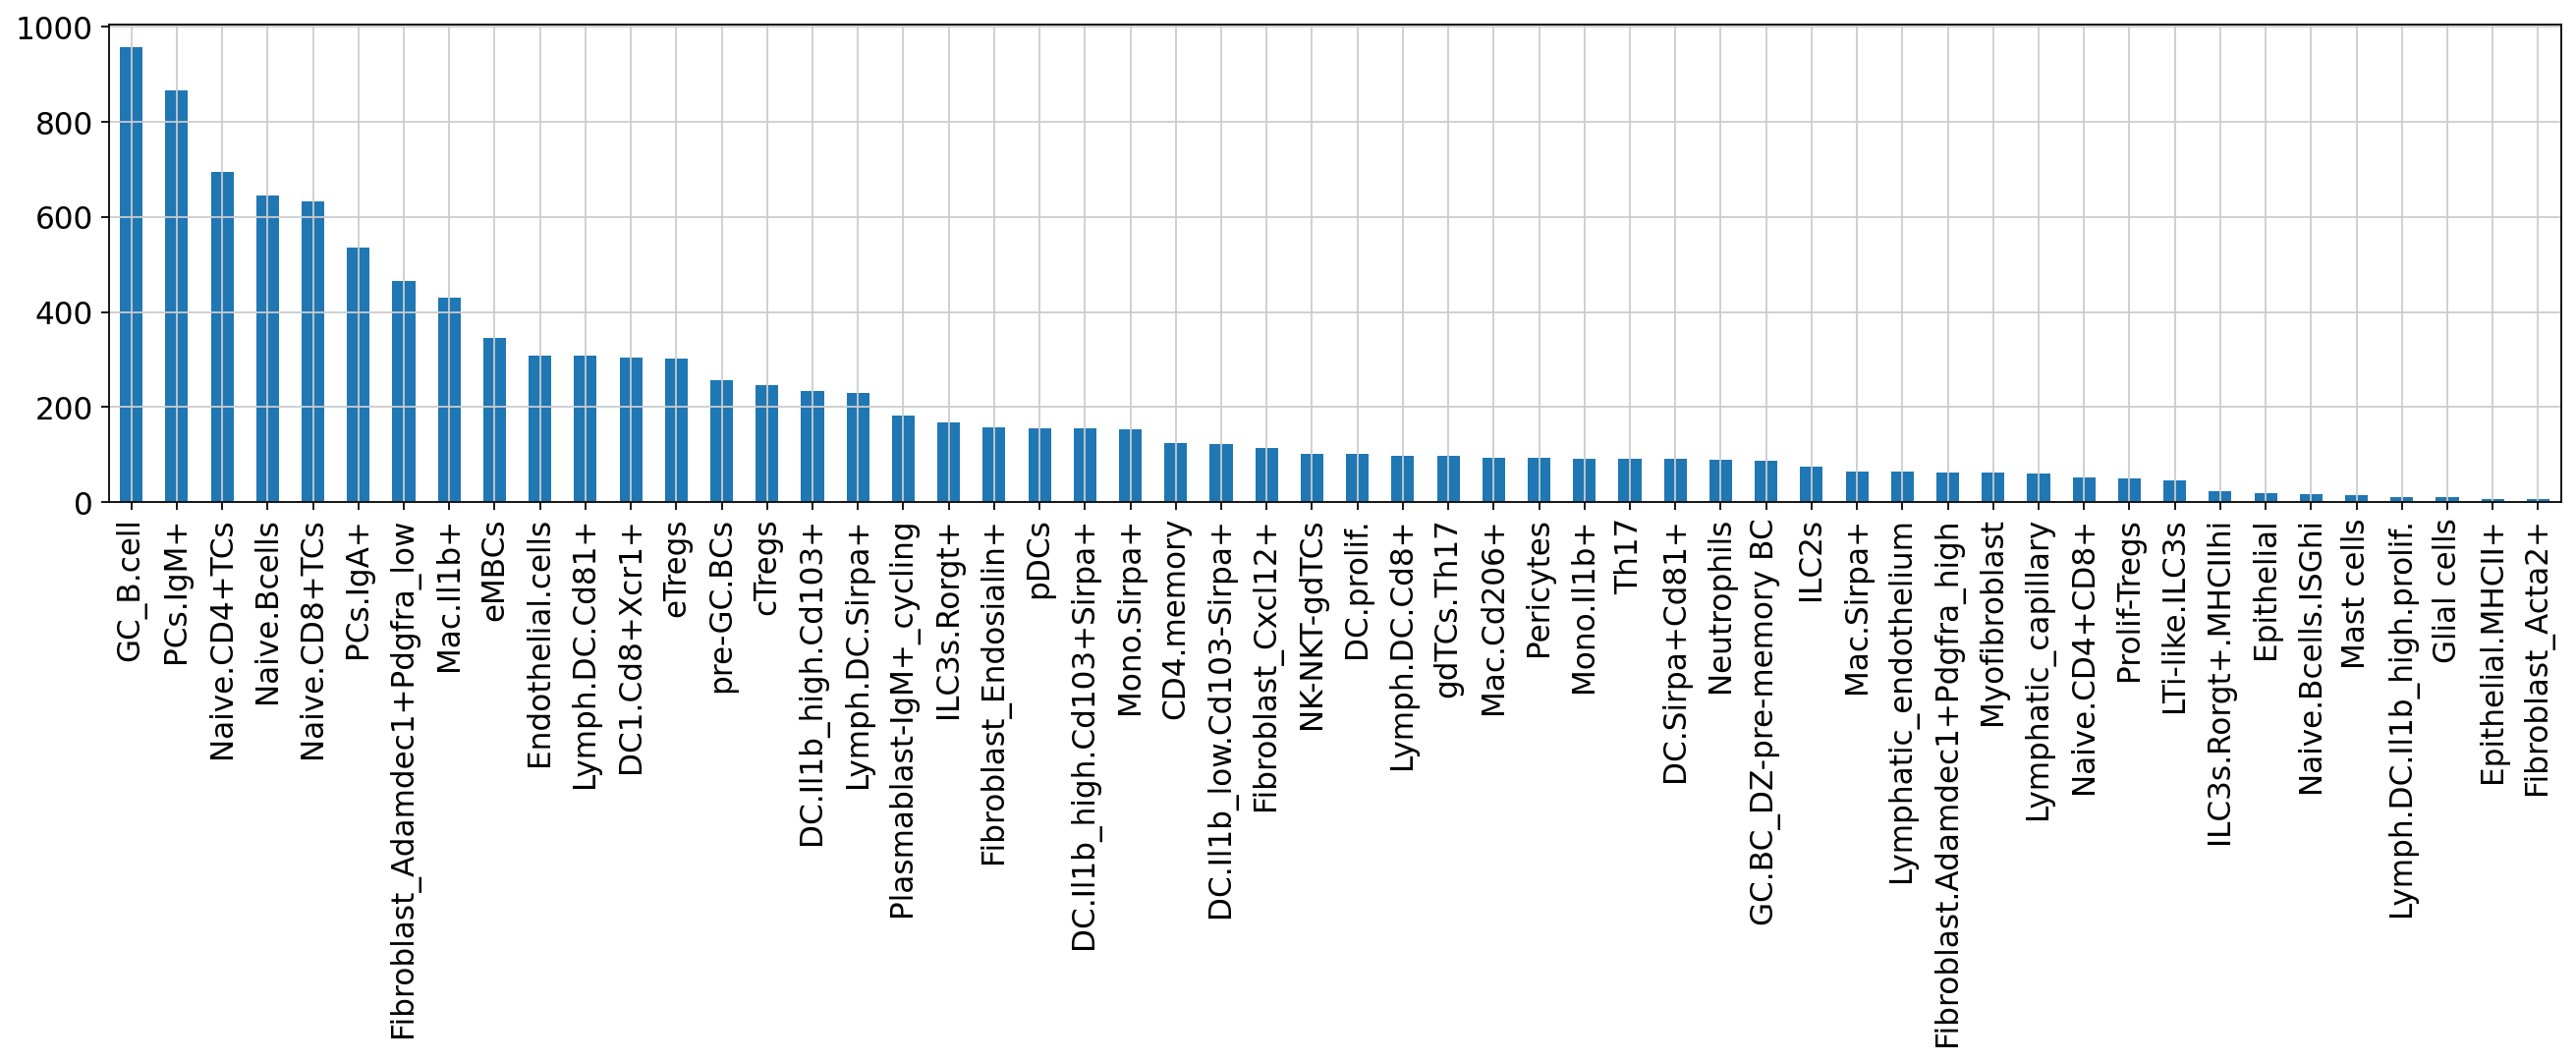

In [11]:
nicheSeq.obs['anno'].value_counts().plot(kind='bar', figsize=(20,4))

In [110]:
adata_sel=adata_6ds[adata_6ds.obs["Dataset"].isin(["Biton2018", 'Drokhlyansky2020', 'Xu2019'])]

In [111]:
adata_sel.obs["Dataset"].value_counts()

Xu2019              51172
Biton2018           26955
Drokhlyansky2020     4530
Name: Dataset, dtype: int64

<AxesSubplot:>

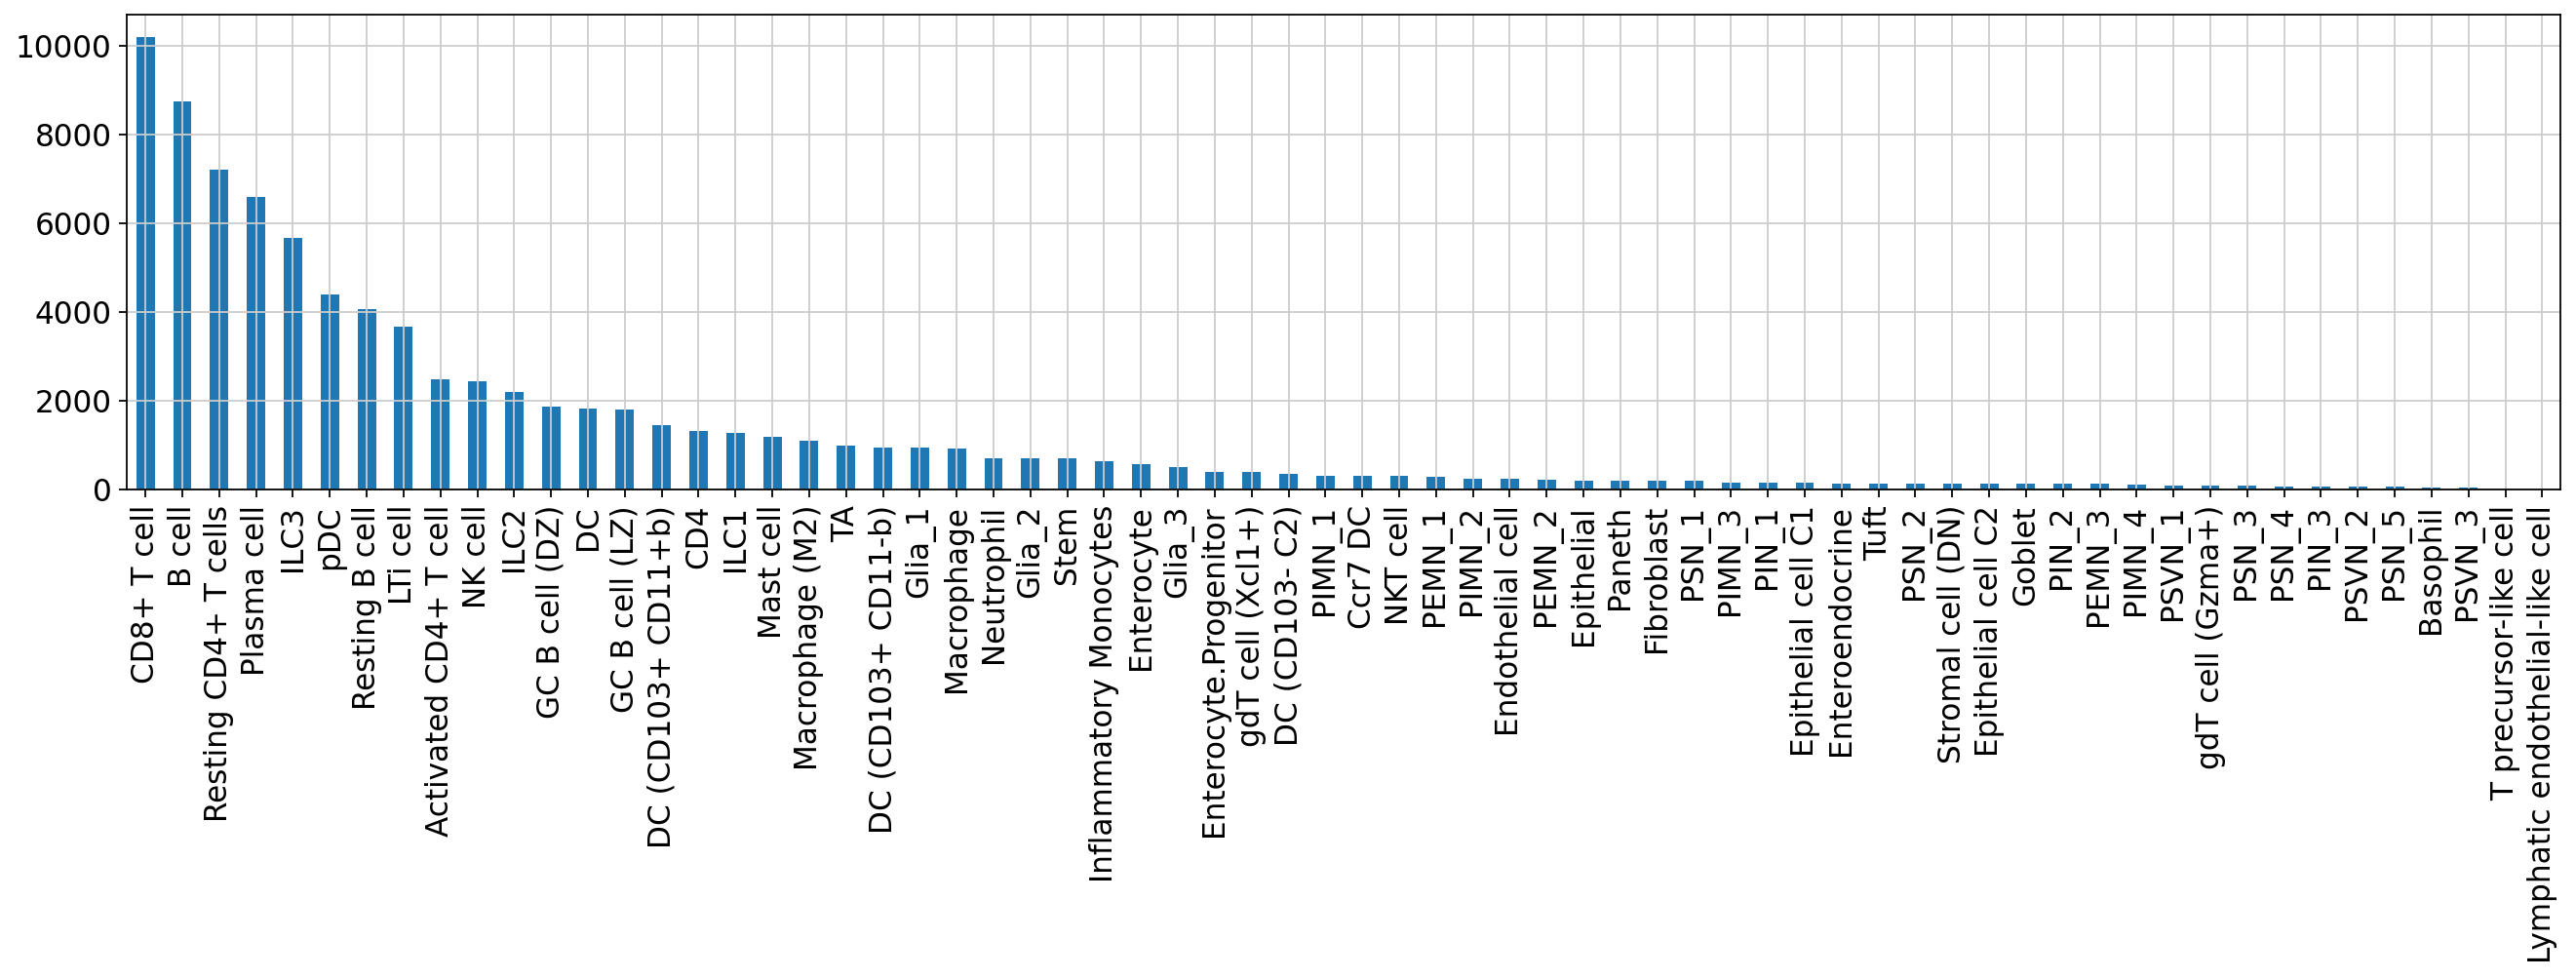

In [112]:
adata_sel.obs['anno'].value_counts().plot(kind='bar', figsize=(20,4))

In [113]:
def label_harm2 (row):
    if row['anno'] in ['Glia_1', 'Glia_2','Glia_3', 'Glial cells']:
        return 'Glia'    
    if row['anno'] in ['PIN_1', 'PIN_2','PIN_3','PIMN_1', 'PIMN_2','PIMN_3','PIMN_4','PSN_1', 'PSN_2','PSN_3','PSN_4','PSN_5',
                       'PSVN_1', 'PSVN_2', 'PSVN_3','PEMN_1', 'PEMN_2', 'PEMN_3']:
        return 'Enteric_neurons'
    else:
        return row['anno']

In [114]:
adata_sel.obs['anno'] = adata_sel.obs.apply(lambda row: label_harm2 (row), axis=1)

<AxesSubplot:>

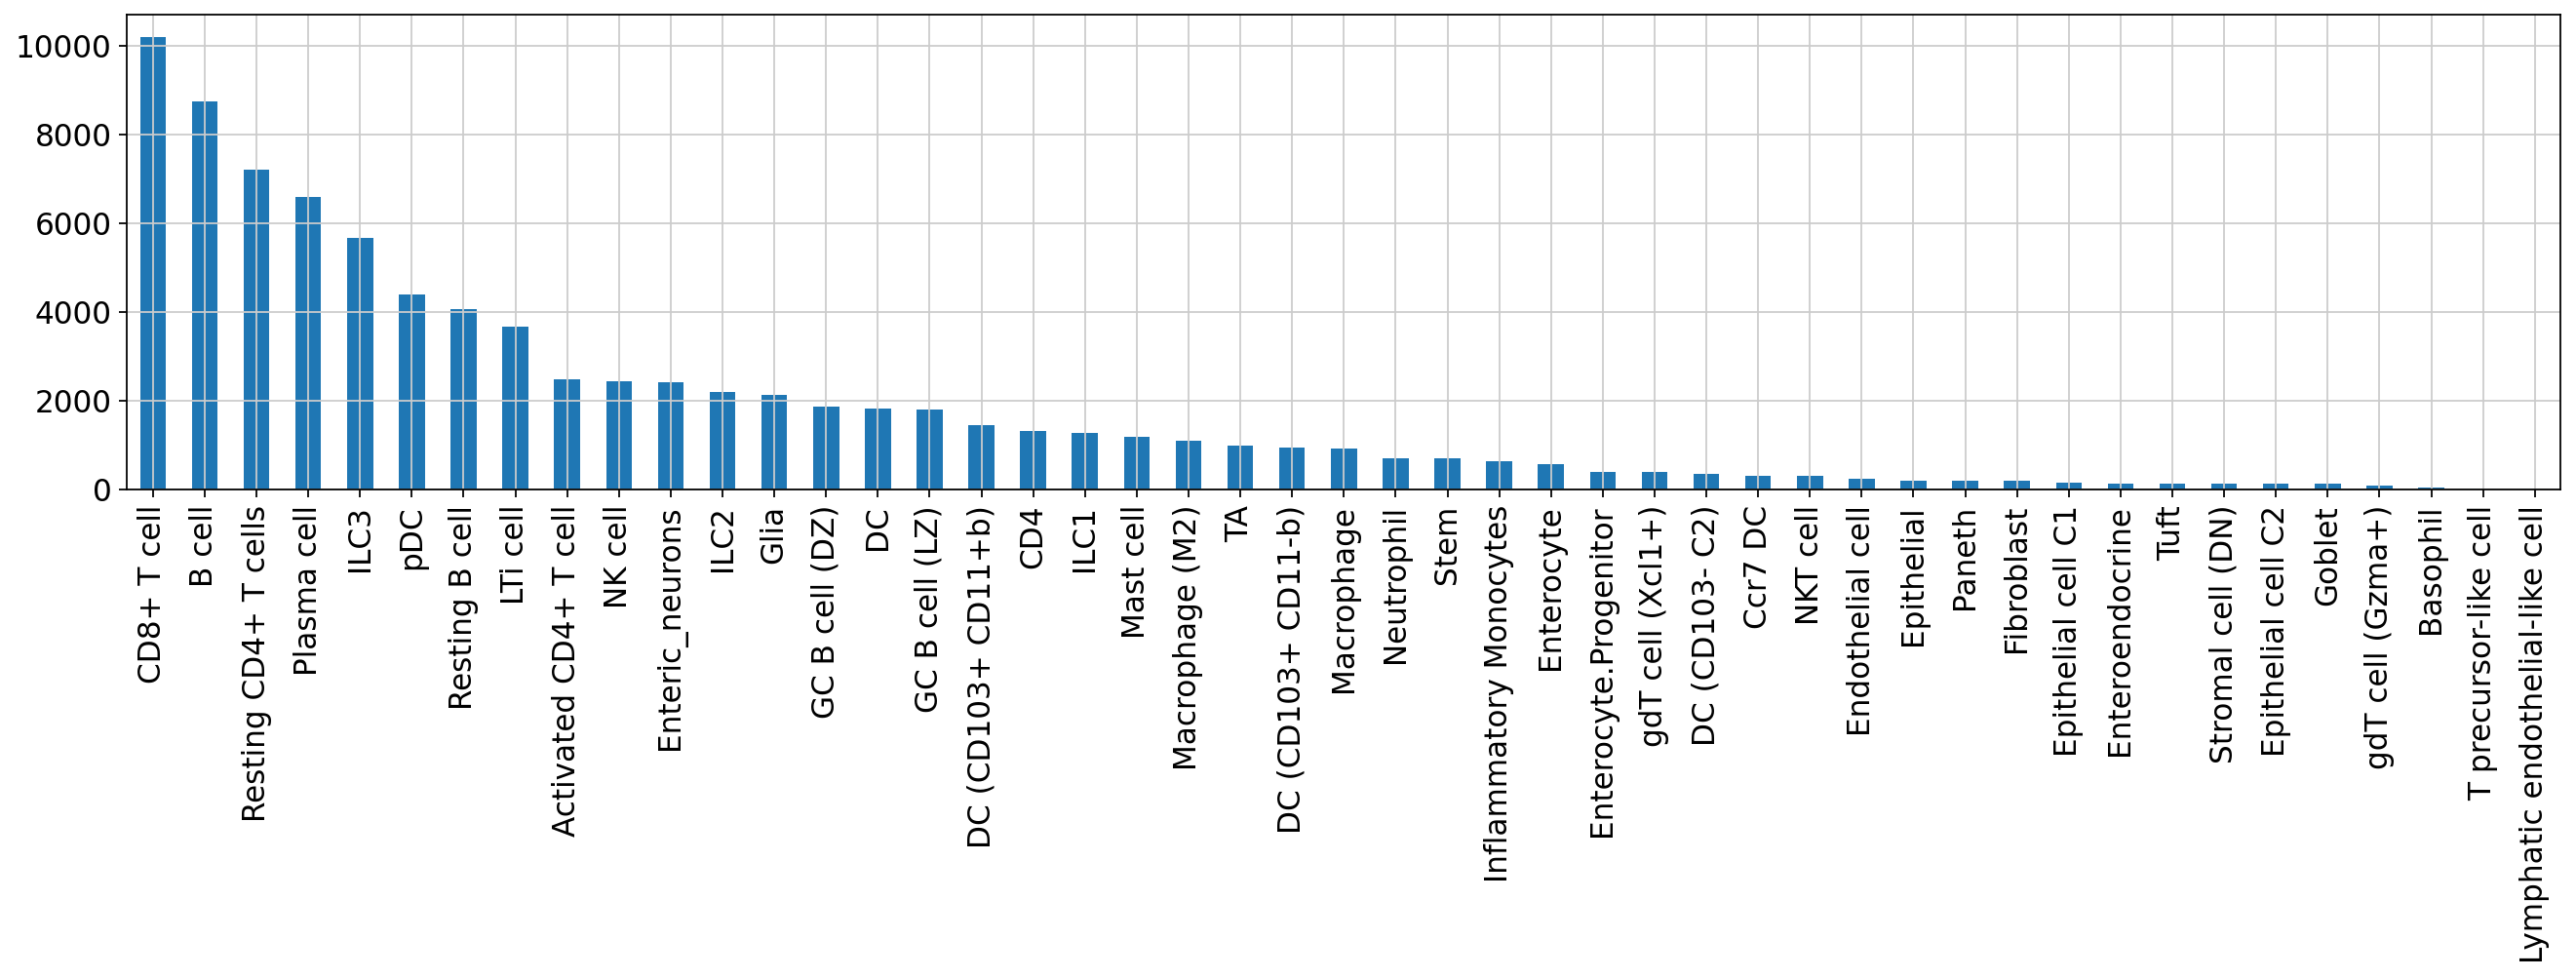

In [115]:
adata_sel.obs['anno'].value_counts().plot(kind='bar', figsize=(20,4))

In [116]:
adata_sel.obs['anno'].value_counts()

CD8+ T cell                        10183
B cell                              8746
Resting CD4+ T cells                7194
Plasma cell                         6576
ILC3                                5662
pDC                                 4384
Resting B cell                      4067
LTi cell                            3663
Activated CD4+ T cell               2481
NK cell                             2420
Enteric_neurons                     2411
ILC2                                2193
Glia                                2119
GC B cell (DZ)                      1857
DC                                  1816
GC B cell (LZ)                      1785
DC (CD103+ CD11+b)                  1441
CD4                                 1319
ILC1                                1255
Mast cell                           1177
Macrophage (M2)                     1091
TA                                   973
DC (CD103+ CD11-b)                   930
Macrophage                           919
Neutrophil      

In [117]:
cell_add=['Basophil','Enterocyte', 'Enterocyte.Progenitor','Enteroendocrine','Epithelial', 'Goblet','Paneth', 'Stem', 'TA', 'Tuft'
         'Glia', 'Enteric_neurons']

In [118]:
adata_sel=adata_sel[adata_sel.obs["anno"].isin(cell_add)]

<AxesSubplot:>

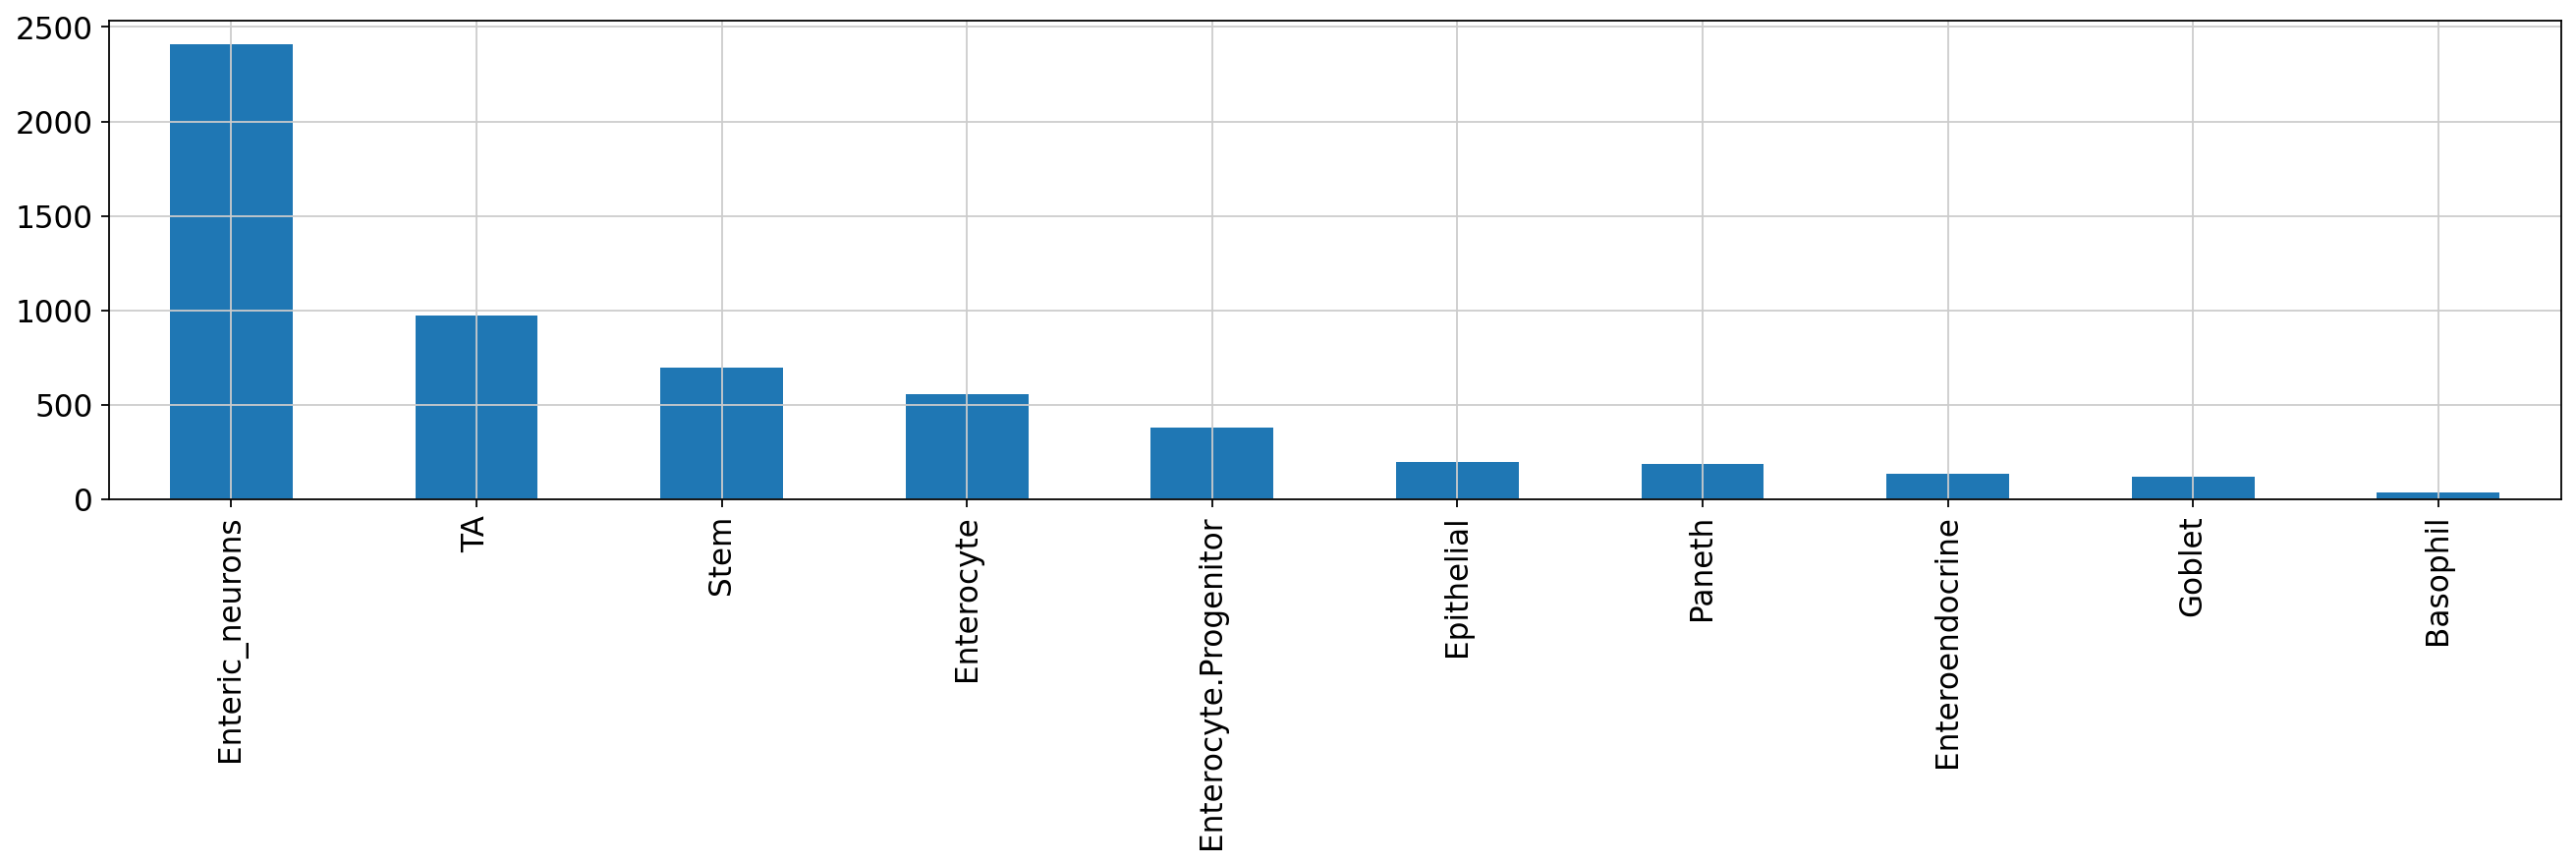

In [119]:
adata_sel.obs['anno'].value_counts().plot(kind='bar', figsize=(20,4))

In [120]:
adata_sel.obs["barcode_merged"]=adata_sel.obs_names

In [121]:
adata_sel.obs["barcode_merged"]

07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGCTGGC-Xu2019          07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGC...
07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCGTTGA-Xu2019          07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCG...
07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAACGCGA-Xu2019          07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAAC...
07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGCAGTA-Xu2019          07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGC...
07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGCTGCC-Xu2019          07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGC...
                                                                                         ...                        
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                                TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                 TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton...
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                      

In [122]:
adata_sel

AnnData object with n_obs × n_vars = 5693 × 14498
    obs: 'original_annotation', 'anno', 'Dataset', 'barcode_merged'

In [133]:
adata_Xu=adata_sel[adata_sel.obs["Dataset"].isin(['Xu2019'])]
adata_Xu.obs["sample_name"]=adata_Xu.obs["barcode_merged"].str.slice(0,-24)

In [136]:
adata_Dro=adata_sel[adata_sel.obs["Dataset"].isin(['Drokhlyansky2020'])]
adata_Dro.obs["sample_name"]=adata_Dro.obs["barcode_merged"].str.slice(0,-34)

In [132]:
adata_biton=adata_sel[adata_sel.obs["Dataset"].isin(['Biton2018'])]
adata_biton.obs['sample_name']=(adata_biton.obs["barcode_merged"].str.slice(17,-10)).str.rsplit("_",n=1,expand=False).str[0]

In [137]:
obs_concat=pd.concat([adata_Xu.obs,adata_Dro.obs,adata_biton.obs])

In [140]:
obs_concat = obs_concat.filter(['sample_name'])

In [141]:
obs_concat

sample_name
07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGCT...  07142017_PP_WT_Allergy_v2_Allergy
07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCGT...  07142017_PP_WT_Allergy_v2_Allergy
07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAACG...  07142017_PP_WT_Allergy_v2_Allergy
07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGCA...  07142017_PP_WT_Allergy_v2_Allergy
07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGCT...  07142017_PP_WT_Allergy_v2_Allergy
...                                                                               ...
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                               MHCII_dGut_3
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018               MHCII_Flox_Control_3
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                               MHCII_dGut_3
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...               MHCII_Flox_Control_3
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...               MHCII_Flox_Control_5

[5693 rows x 1 columns]

In [142]:
adata_sel.obs=adata_sel.obs.join(obs_concat)

In [147]:
adata_sel.obs.drop(columns=['barcode_merged'], inplace=True)

In [148]:
adata_sel.obs

original_annotation  \
07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGCT...            Basophil   
07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCGT...            Basophil   
07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAACG...            Basophil   
07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGCA...            Basophil   
07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGCT...            Basophil   
...                                                                ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018             Enterocyte.prog   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018             Enterocyte.prog   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...     Enterocyte.prog   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                Stem   

                                                                     anno  \
07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGCT...               Basophil   
07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCGT...               Basophil   
07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAACG...               Basophil   
07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGCA...               Basophil   
07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGCT...               Basophil   
...                                                                   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                   Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Enterocyte.Progenitor   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                   Stem   

                                                      Dataset  \
07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGCT...     Xu2019   
07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCGT...     Xu2019   
07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAACG...     Xu2019   
07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGCA...     Xu2019   
07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGCT...     Xu2019   
...                                                       ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  Biton2018   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Biton2018   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  Biton2018   

                                                                          sample_name  
07142017_PP_WT_Allergy_v2_Allergy_AACTCAGCATGCT...  07142017_PP_WT_Allergy_v2_Allergy  
07142017_PP_WT_Allergy_v2_Allergy_ACACTGAGTTCGT...  07142017_PP_WT_Allergy_v2_Allergy  
07142017_PP_WT_Allergy_v2_Allergy_ACTGTCCCAAACG...  07142017_PP_WT_Allergy_v2_Allergy  
07142017_PP_WT_Allergy_v2_Allergy_AGGGAGTCAGGCA...  07142017_PP_WT_Allergy_v2_Allergy  
07142017_PP_WT_Allergy_v2_Allergy_CAACCAAGTAGCT...  07142017_PP_WT_Allergy_v2_Allergy  
...                                                                               ...  
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                               MHCII_dGut_3  
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018               MHCII_Flox_Control_3  
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                               MHCII_dGut_3  
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...               MHCII_Flox_Control_3  
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...               MHCII_Flox_Control_5  

[5693 rows x 4 columns]

In [151]:
raw.obs['sample_name']=raw.obs["original_annotation"].str.rsplit("_",n=1,expand=False).str[1]

In [156]:
raw.obs

original_annotation  \
AAACCTGAGCCCAATT-1-0               GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                         cTregs_MLN   
AAACCTGCATGGTTGT-1-0                  PCs.CD19+IgM+_MLN   
...                                                 ...   
TTTGTCAAGGCAATTA-1-3               Endothelial.cells_LP   
TTTGTCACATGACGGA-1-3                      Mac.Cd206+_LP   
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low_LP   
TTTGTCATCAACACCA-1-3               Endothelial.cells_LP   
TTTGTCATCCGCGGTA-1-3                          eTregs_LP   

                                                anno   Dataset sample_name  
AAACCTGAGCCCAATT-1-0                GC.BC_LZ-resting  NicheSeq         MLN  
AAACCTGAGCGTTGCC-1-0                 Lymph.DC.Sirpa+  NicheSeq         MLN  
AAACCTGAGGTGATTA-1-0                 PCs.CD19-IgM+.2  NicheSeq         MLN  
AAACCTGCAACGATGG-1-0                          cTregs  NicheSeq         MLN  
AAACCTGCATGGTTGT-1-0                   PCs.CD19+IgM+  NicheSeq         MLN  
...                                              ...       ...         ...  
TTTGTCAAGGCAATTA-1-3               Endothelial.cells  NicheSeq          LP  
TTTGTCACATGACGGA-1-3                      Mac.Cd206+  NicheSeq          LP  
TTTGTCAGTCAATGTC-1-3  Fibroblast_Adamdec1+Pdgfra_low  NicheSeq          LP  
TTTGTCATCAACACCA-1-3               Endothelial.cells  NicheSeq          LP  
TTTGTCATCCGCGGTA-1-3                          eTregs  NicheSeq          LP  

[10831 rows x 4 columns]

In [154]:
adata_ref = raw.concatenate(adata_sel, index_unique=None, join="inner")

In [158]:
def tech (row):
    if row['Dataset'] in ['NicheSeq']:
        return '5GEX'    
    if row['Dataset'] in ['Xu2019', 'Biton2018', 'Drokhlyansky2020']:
        return '3GEX'

In [159]:
adata_ref.obs['tech'] = adata_ref.obs.apply(lambda row: tech (row), axis=1)

In [160]:
adata_ref.obs

original_annotation  \
AAACCTGAGCCCAATT-1-0                                GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                                 Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                                 PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                                          cTregs_MLN   
AAACCTGCATGGTTGT-1-0                                   PCs.CD19+IgM+_MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                  Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...       Enterocyte.prog   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                  Stem   

                                                                     anno  \
AAACCTGAGCCCAATT-1-0                                     GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                                      Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                                      PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                                               cTregs   
AAACCTGCATGGTTGT-1-0                                        PCs.CD19+IgM+   
...                                                                   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                   Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Enterocyte.Progenitor   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                   Stem   

                                                      Dataset  \
AAACCTGAGCCCAATT-1-0                                 NicheSeq   
AAACCTGAGCGTTGCC-1-0                                 NicheSeq   
AAACCTGAGGTGATTA-1-0                                 NicheSeq   
AAACCTGCAACGATGG-1-0                                 NicheSeq   
AAACCTGCATGGTTGT-1-0                                 NicheSeq   
...                                                       ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  Biton2018   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Biton2018   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  Biton2018   

                                                             sample_name  \
AAACCTGAGCCCAATT-1-0                                                 MLN   
AAACCTGAGCGTTGCC-1-0                                                 MLN   
AAACCTGAGGTGATTA-1-0                                                 MLN   
AAACCTGCAACGATGG-1-0                                                 MLN   
AAACCTGCATGGTTGT-1-0                                                 MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  MHCII_Flox_Control_3   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  MHCII_Flox_Control_3   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  MHCII_Flox_Control_5   

                                                   batch  tech  
AAACCTGAGCCCAATT-1-0                                   0  5GEX  
AAACCTGAGCGTTGCC-1-0                                   0  5GEX  
AAACCTGAGGTGATTA-1-0                                   0  5GEX  
AAACCTGCAACGATGG-1-0                                   0  5GEX  
AAACCTGCATGGTTGT-1-0                                   0  5GEX  
...                                                  ...   ...  
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018             1  3GEX  
T

In [161]:
adata_ref.layers["counts"] = adata_ref.X.copy()

In [133]:
# This step we do in ScVI
#sc.pp.normalize_total(adata_ref, target_sum=1e4)
#sc.pp.log1p(adata_ref)

normalizing counts per cell
    finished (0:00:00)


In [ ]:
# We can store the normalized values in .raw to keep them safe in the event the anndata gets subsetted feature-wise.

In [162]:
adata_ref.raw = adata_ref

In [164]:
adata_ref.write("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/scRNAseq_reference_for_C2L/Reference_object_C2L_rawCounts_inner_beforeSCVI.h5ad")

## SCVI integration

In [ ]:
# With GPU notebooks: 

In [1]:
import scvi
from collections import Counter

In [2]:
adata=sc.read("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/h5ad_files/Reference_object_C2L_rawCounts_inner_beforeSCVI.h5ad")

In [4]:
adata.layers["counts"] = adata.X.copy()
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [1]:
sc.pp.highly_variable_genes(
    adata,
    flavor="seurat_v3",
    n_top_genes=10000,
    layer="counts",
    batch_key="Dataset",
    span=1,
    subset=False)

In [17]:
import re
for i in adata.var.index:
    if re.search('^Tr[ab][vdj]|^Ig[hkl][vdjc]', i):
        adata.var.at[i, 'highly_variable'] = False

In [7]:
adata = adata[:,adata.var.highly_variable]

In [13]:
adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
adata.var['rb'] = adata.var_names.str.startswith(('Rps','Rpl'))  # annotate the group of ribosomal proteins as 'rb'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pp.calculate_qc_metrics(adata, qc_vars=['rb'], percent_top=None, log1p=False, inplace=True)

/tmp/ipykernel_52929/1393028986.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'


In [23]:
adata = adata.copy()

In [19]:
scvi.model.SCVI.setup_anndata(adata, layer='counts',
                              batch_key="Dataset",
                              continuous_covariate_keys=["pct_counts_mt", "pct_counts_rb"])

In [20]:
vae = scvi.model.SCVI(adata, n_layers=2, n_latent=30, gene_likelihood="nb")

In [2]:
#vae.train(max_epochs=300, check_val_every_n_epoch=1, early_stopping=True, early_stopping_monitor='elbo_validation')

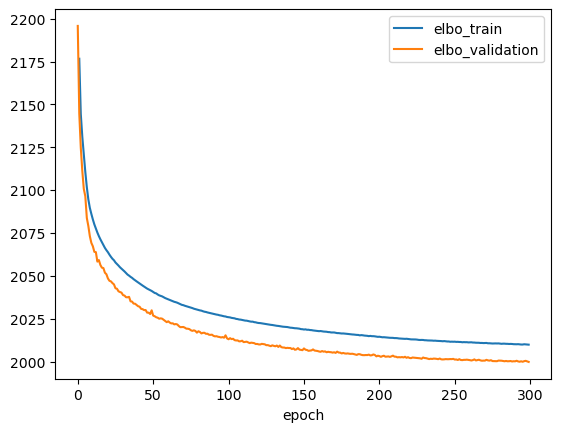

In [11]:
train_elbo = vae.history['elbo_train'][1:]
test_elbo = vae.history['elbo_validation']

ax = train_elbo.plot()
test_elbo.plot(ax = ax);

In [12]:
vae.save('./models/scvi_2023-01-24_model', overwrite = True, save_anndata=True)

In [2]:
vae = scvi.model.SCVI.load('./models/scvi_2023-01-24_model')

INFO     File ./models/scvi_2022-12-15_model/model.pt already downloaded                     


In [ ]:
adata.obsm["X_scVI"] = vae.get_latent_representation()
#sc.pp.neighbors(adata, use_rep="X_scVI")

In [3]:
sc.tl.umap(adata)
adata.obsm["X_mde"] = scvi.model.utils.mde(adata.obsm["X_scVI"])

In [7]:
adata.write('Reference_C2L_NicheSeqplus3ds_rawCounts_inner_AfterSCVI.h5ad')

## Continue here analysis after ScvI integration

In [3]:
# Recover the object with all the genes:
adata_ori=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/scRNAseq_reference_for_C2L/Reference_object_C2L_rawCounts_inner_beforeSCVI.h5ad')

In [2]:
adata_scvi=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/scRNAseq_reference_for_C2L/Reference_C2L_NicheSeqplus3ds_rawCounts_inner_AfterSCVI.h5ad')

In [176]:
adata_ori.obsm['X_scVI']=adata_scvi.obsm['X_scVI']

In [7]:
adata=adata_ori.copy()

In [3]:
adata.var

gene_ids-0  feature_types-0 genome-0  n_cells-0
Sox17    ENSMUSG00000025902  Gene Expression     mm10        221
Mrpl15   ENSMUSG00000033845  Gene Expression     mm10       3218
Lypla1   ENSMUSG00000025903  Gene Expression     mm10       2460
Tcea1    ENSMUSG00000033813  Gene Expression     mm10       6241
Rgs20    ENSMUSG00000002459  Gene Expression     mm10          3
...                     ...              ...      ...        ...
Arhgap6  ENSMUSG00000031355  Gene Expression     mm10        742
Amelx    ENSMUSG00000031354  Gene Expression     mm10         13
Hccs     ENSMUSG00000031352  Gene Expression     mm10       1295
Mid1     ENSMUSG00000035299  Gene Expression     mm10        504
Csprs    ENSMUSG00000062783  Gene Expression     mm10         91

[13607 rows x 4 columns]

In [178]:
adata

AnnData object with n_obs × n_vars = 16524 × 13607
    obs: 'original_annotation', 'anno', 'Dataset', 'sample_name', 'batch', 'tech'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0'
    uns: 'Dataset_colors', 'neighbors_scvi', 'umap'
    obsm: 'X_mde', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'neighbors_scvi_connectivities', 'neighbors_scvi_distances'

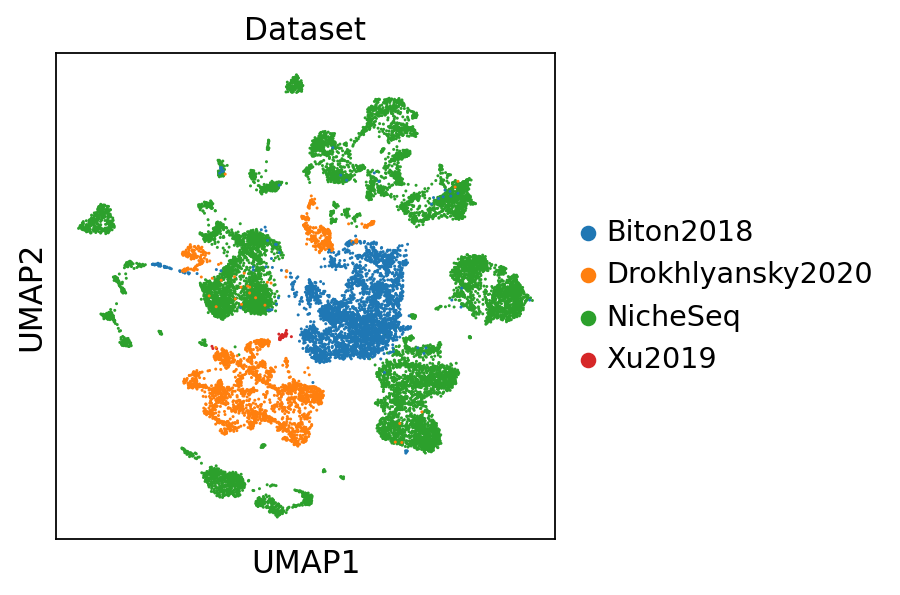

In [4]:
sc.pl.umap(adata, color='Dataset', save="scRNAseq_ref_c2l_datasets.pdf")

In [180]:
adata.obs


original_annotation  \
AAACCTGAGCCCAATT-1-0                                GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                                 Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                                 PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                                          cTregs_MLN   
AAACCTGCATGGTTGT-1-0                                   PCs.CD19+IgM+_MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                  Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...       Enterocyte.prog   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                  Stem   

                                                                     anno  \
AAACCTGAGCCCAATT-1-0                                     GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                                      Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                                      PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                                               cTregs   
AAACCTGCATGGTTGT-1-0                                        PCs.CD19+IgM+   
...                                                                   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                   Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Enterocyte.Progenitor   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                   Stem   

                                                      Dataset  \
AAACCTGAGCCCAATT-1-0                                 NicheSeq   
AAACCTGAGCGTTGCC-1-0                                 NicheSeq   
AAACCTGAGGTGATTA-1-0                                 NicheSeq   
AAACCTGCAACGATGG-1-0                                 NicheSeq   
AAACCTGCATGGTTGT-1-0                                 NicheSeq   
...                                                       ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  Biton2018   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Biton2018   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  Biton2018   

                                                             sample_name  \
AAACCTGAGCCCAATT-1-0                                                 MLN   
AAACCTGAGCGTTGCC-1-0                                                 MLN   
AAACCTGAGGTGATTA-1-0                                                 MLN   
AAACCTGCAACGATGG-1-0                                                 MLN   
AAACCTGCATGGTTGT-1-0                                                 MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  MHCII_Flox_Control_3   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  MHCII_Flox_Control_3   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  MHCII_Flox_Control_5   

                                                   batch  tech  
AAACCTGAGCCCAATT-1-0                                   0  5GEX  
AAACCTGAGCGTTGCC-1-0                                   0  5GEX  
AAACCTGAGGTGATTA-1-0                                   0  5GEX  
AAACCTGCAACGATGG-1-0                                   0  5GEX  
AAACCTGCATGGTTGT-1-0                                   0  5GEX  
...                                                  ...   ...  
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018             1  3GEX  
T

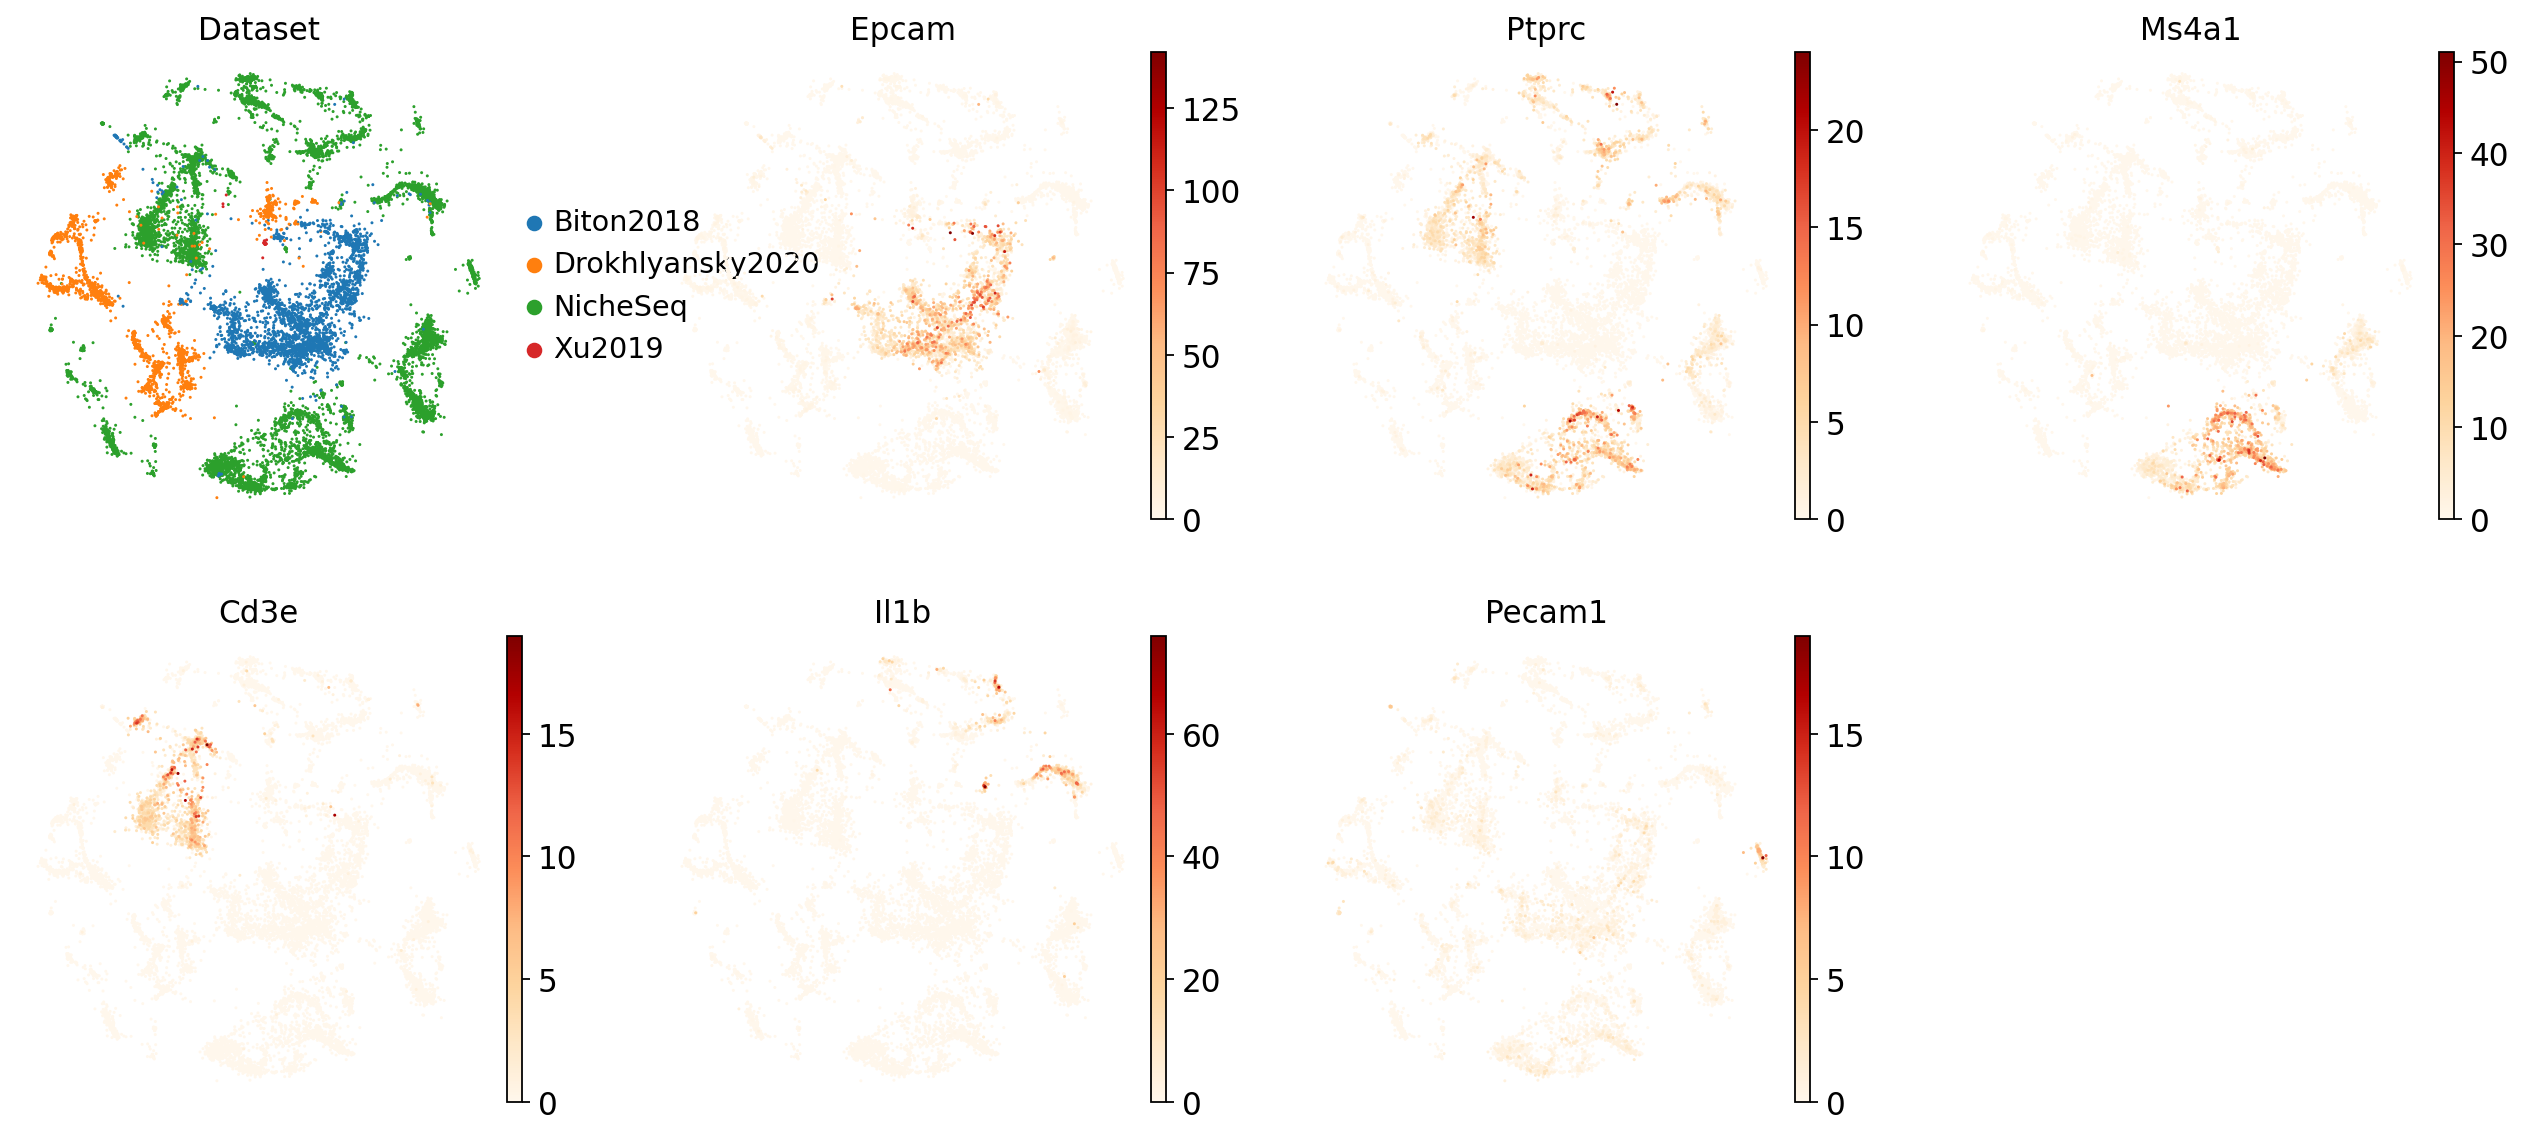

In [181]:
sc.pl.embedding(
    adata,
    basis="X_mde",
    color=["Dataset","Epcam","Ptprc", "Ms4a1", "Cd3e", "Il1b", "Pecam1"],
    frameon=False,
    cmap='OrRd'
)

In [182]:
sc.settings.set_figure_params(dpi=80, color_map='OrRd')

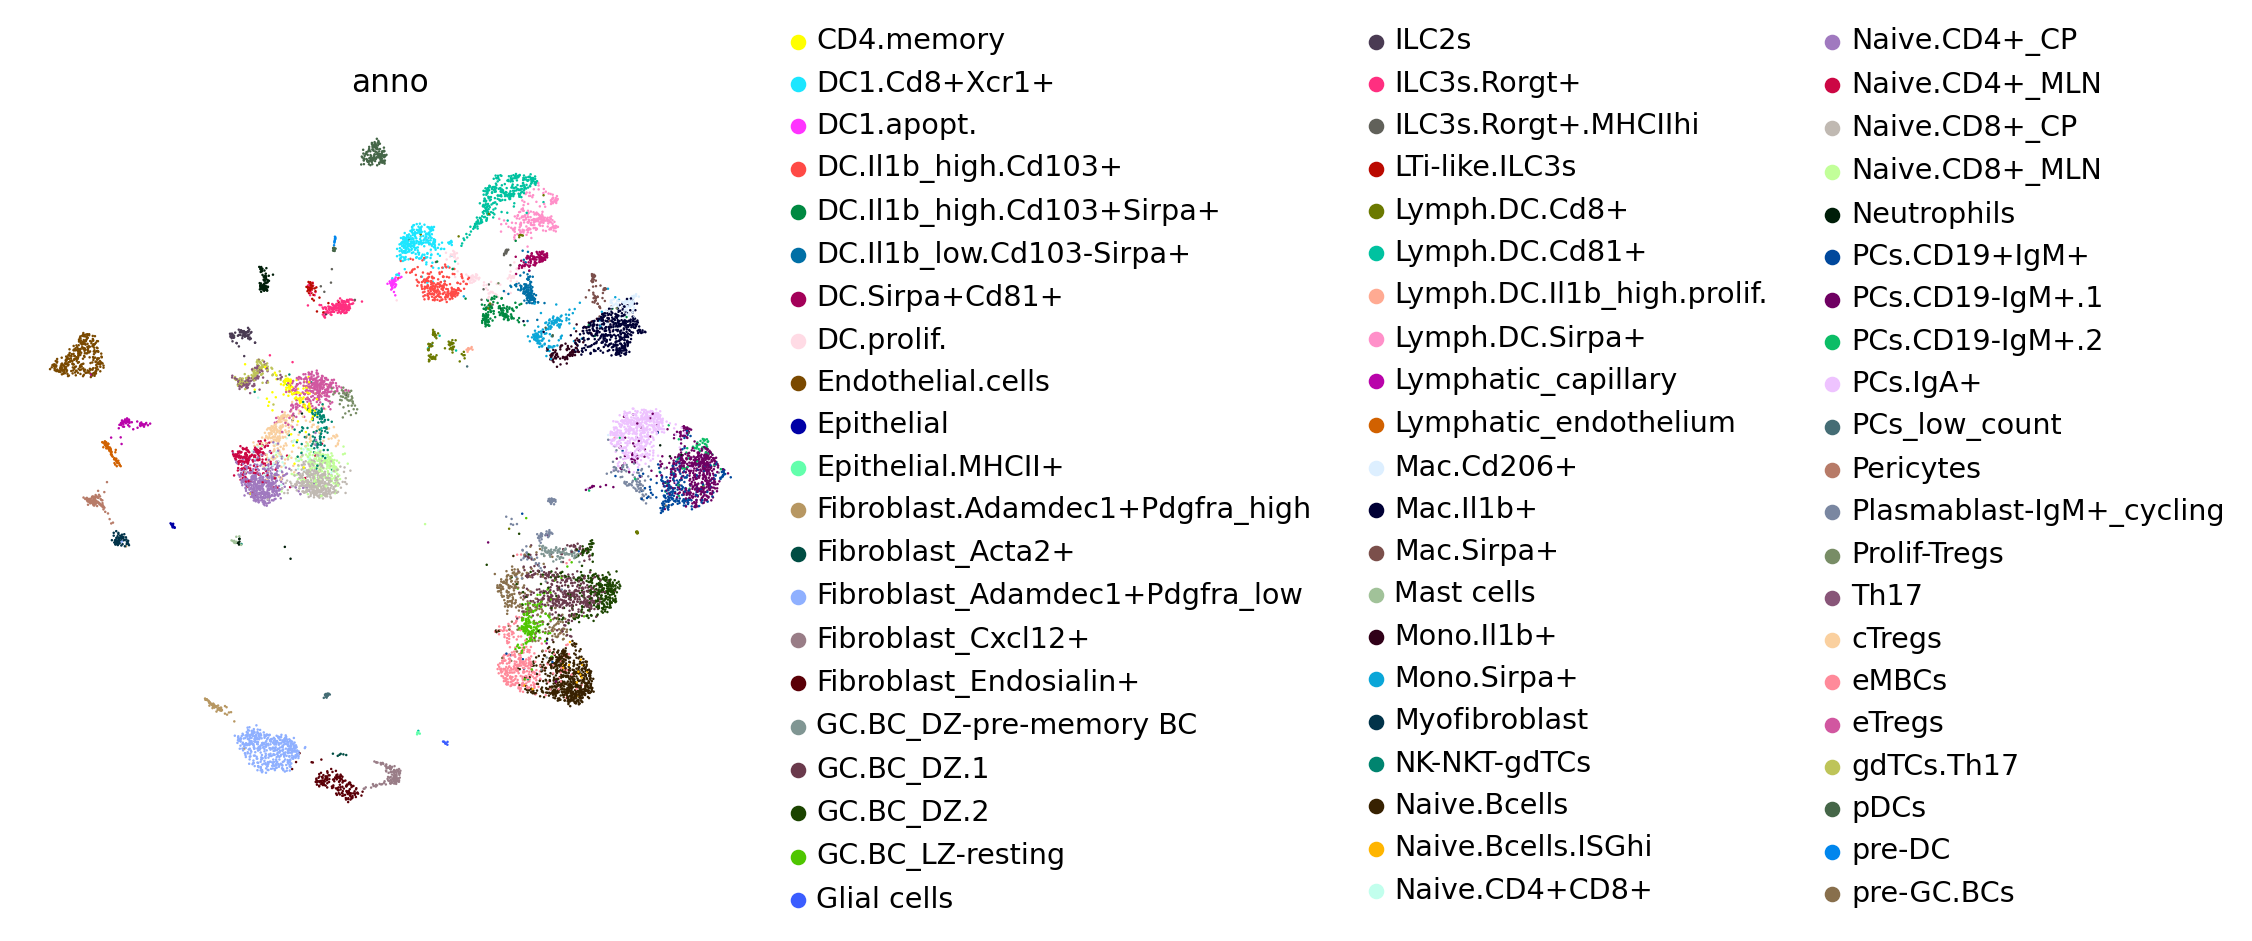

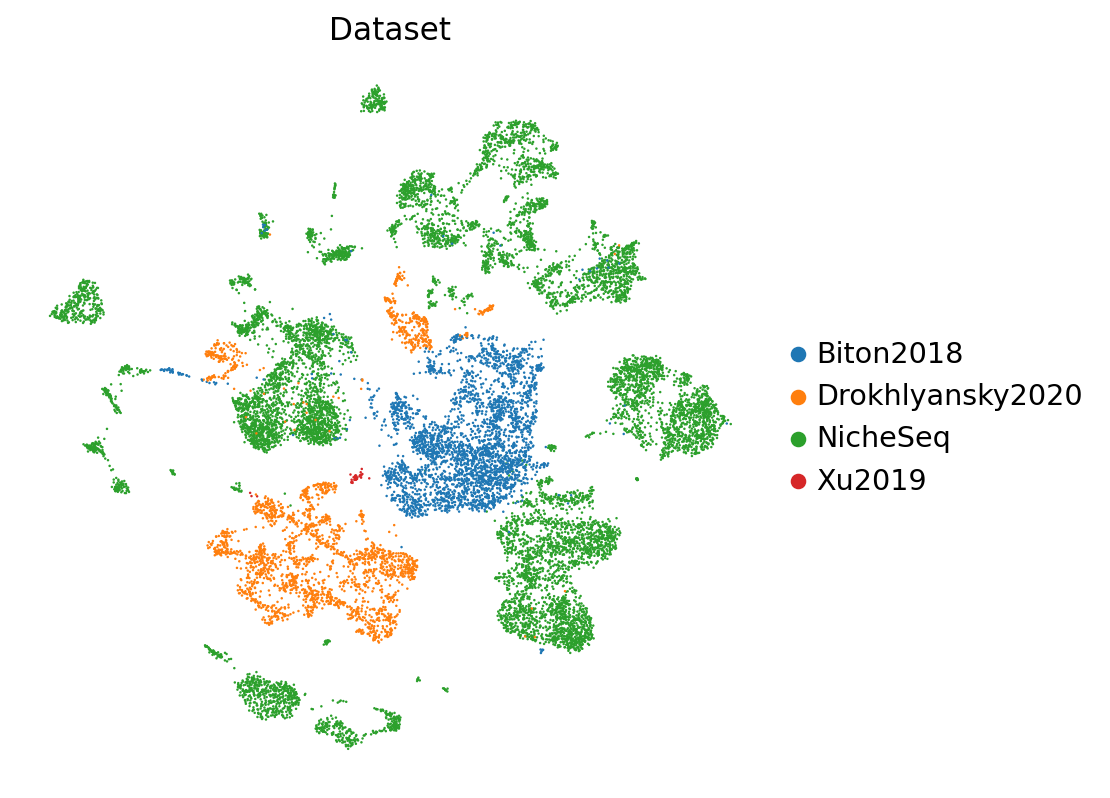

In [183]:
sc.set_figure_params(figsize=(6,6))

sc.pl.umap(adata[adata.obs.Dataset == 'NicheSeq'], color=["anno"], frameon=False, size=5, ncols=3)
sc.pl.umap(adata, color=["Dataset"], frameon=False, size=5, ncols=3)
#sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "pct_counts_mt", "pct_counts_rb"], cmap='OrRd', frameon=False, size=5, ncols=3)

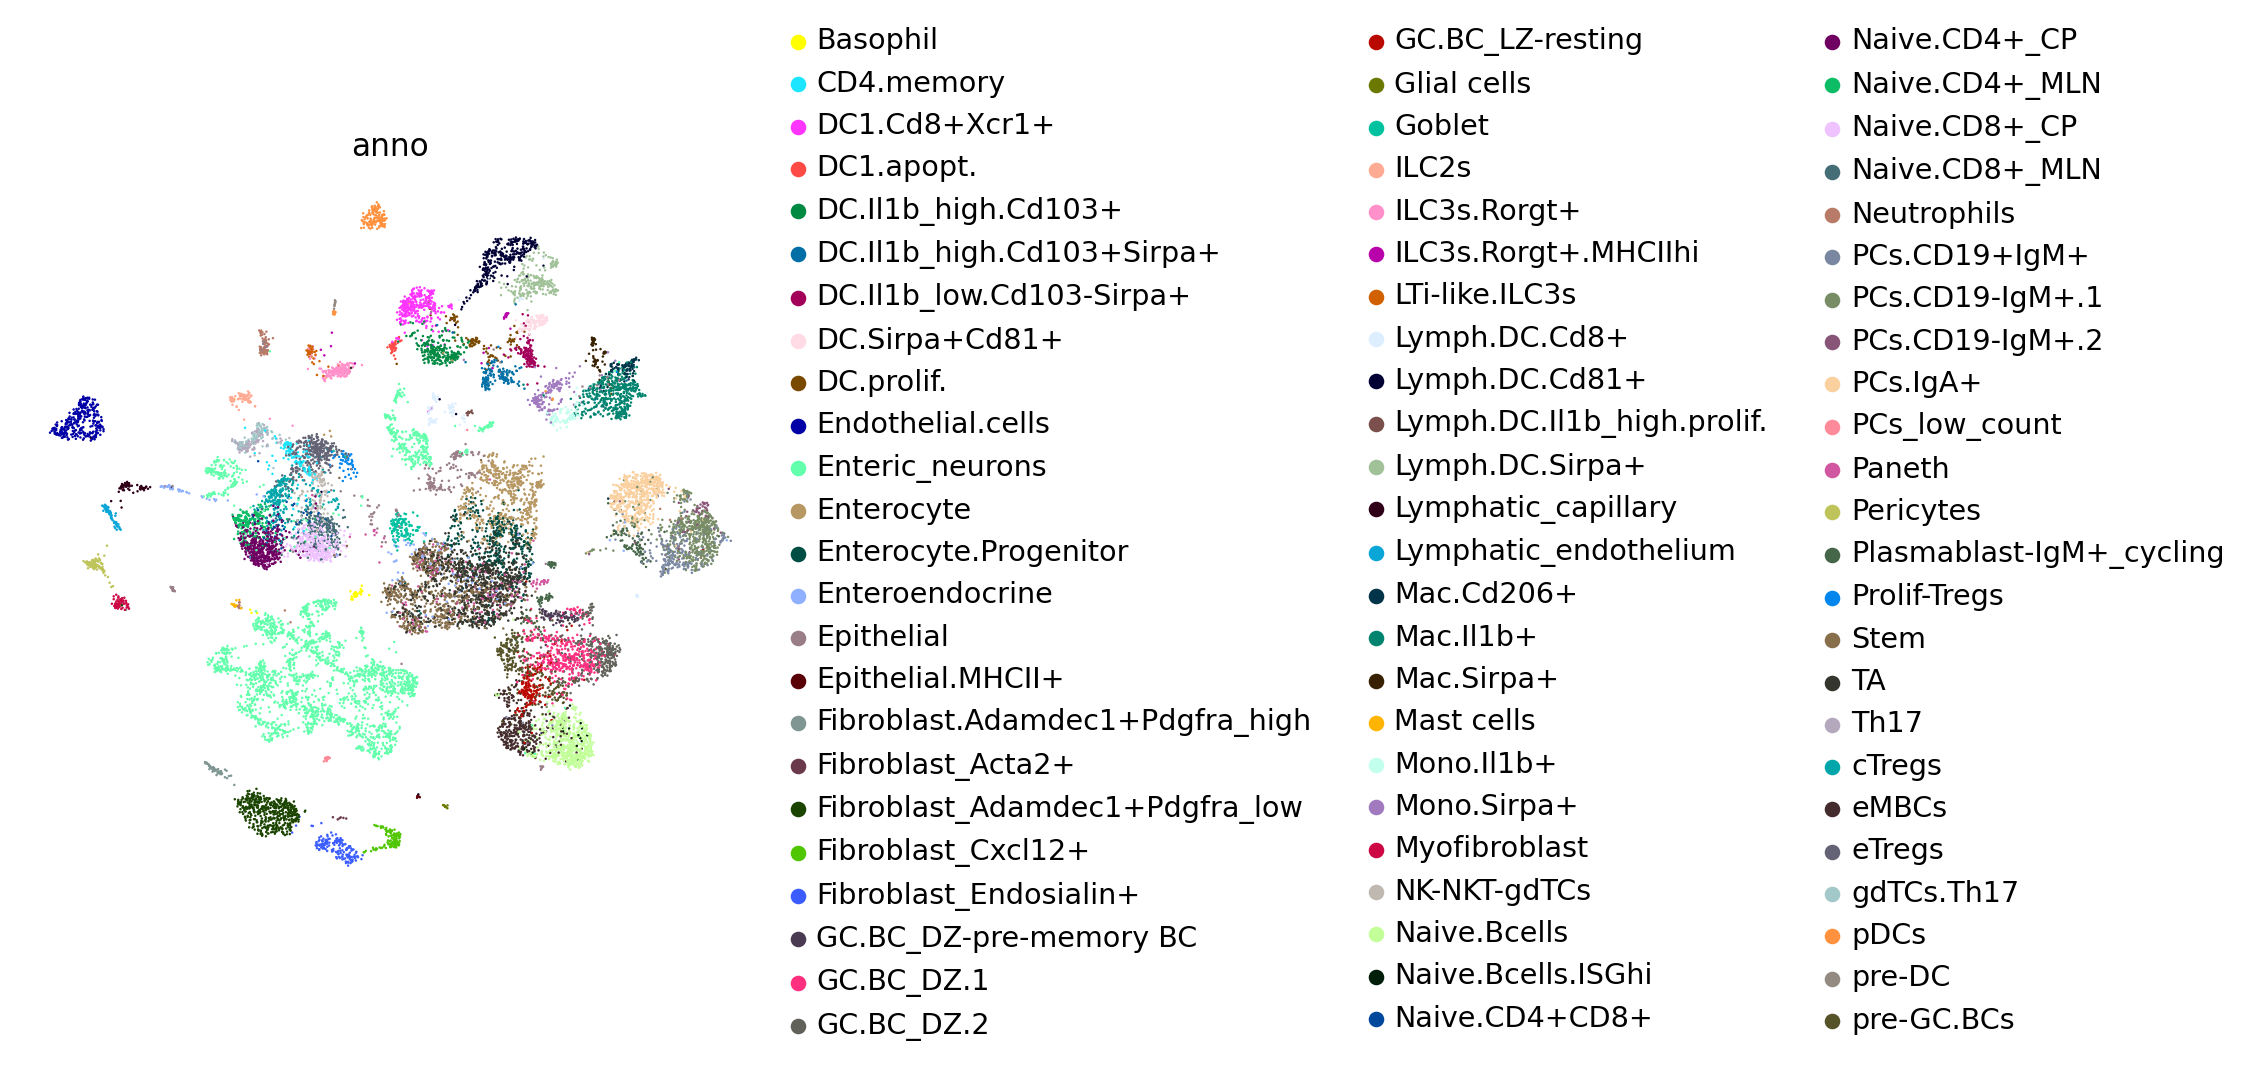

In [184]:
sc.pl.umap(adata, color=["anno"], frameon=False, size=5, ncols=3)

<AxesSubplot:>

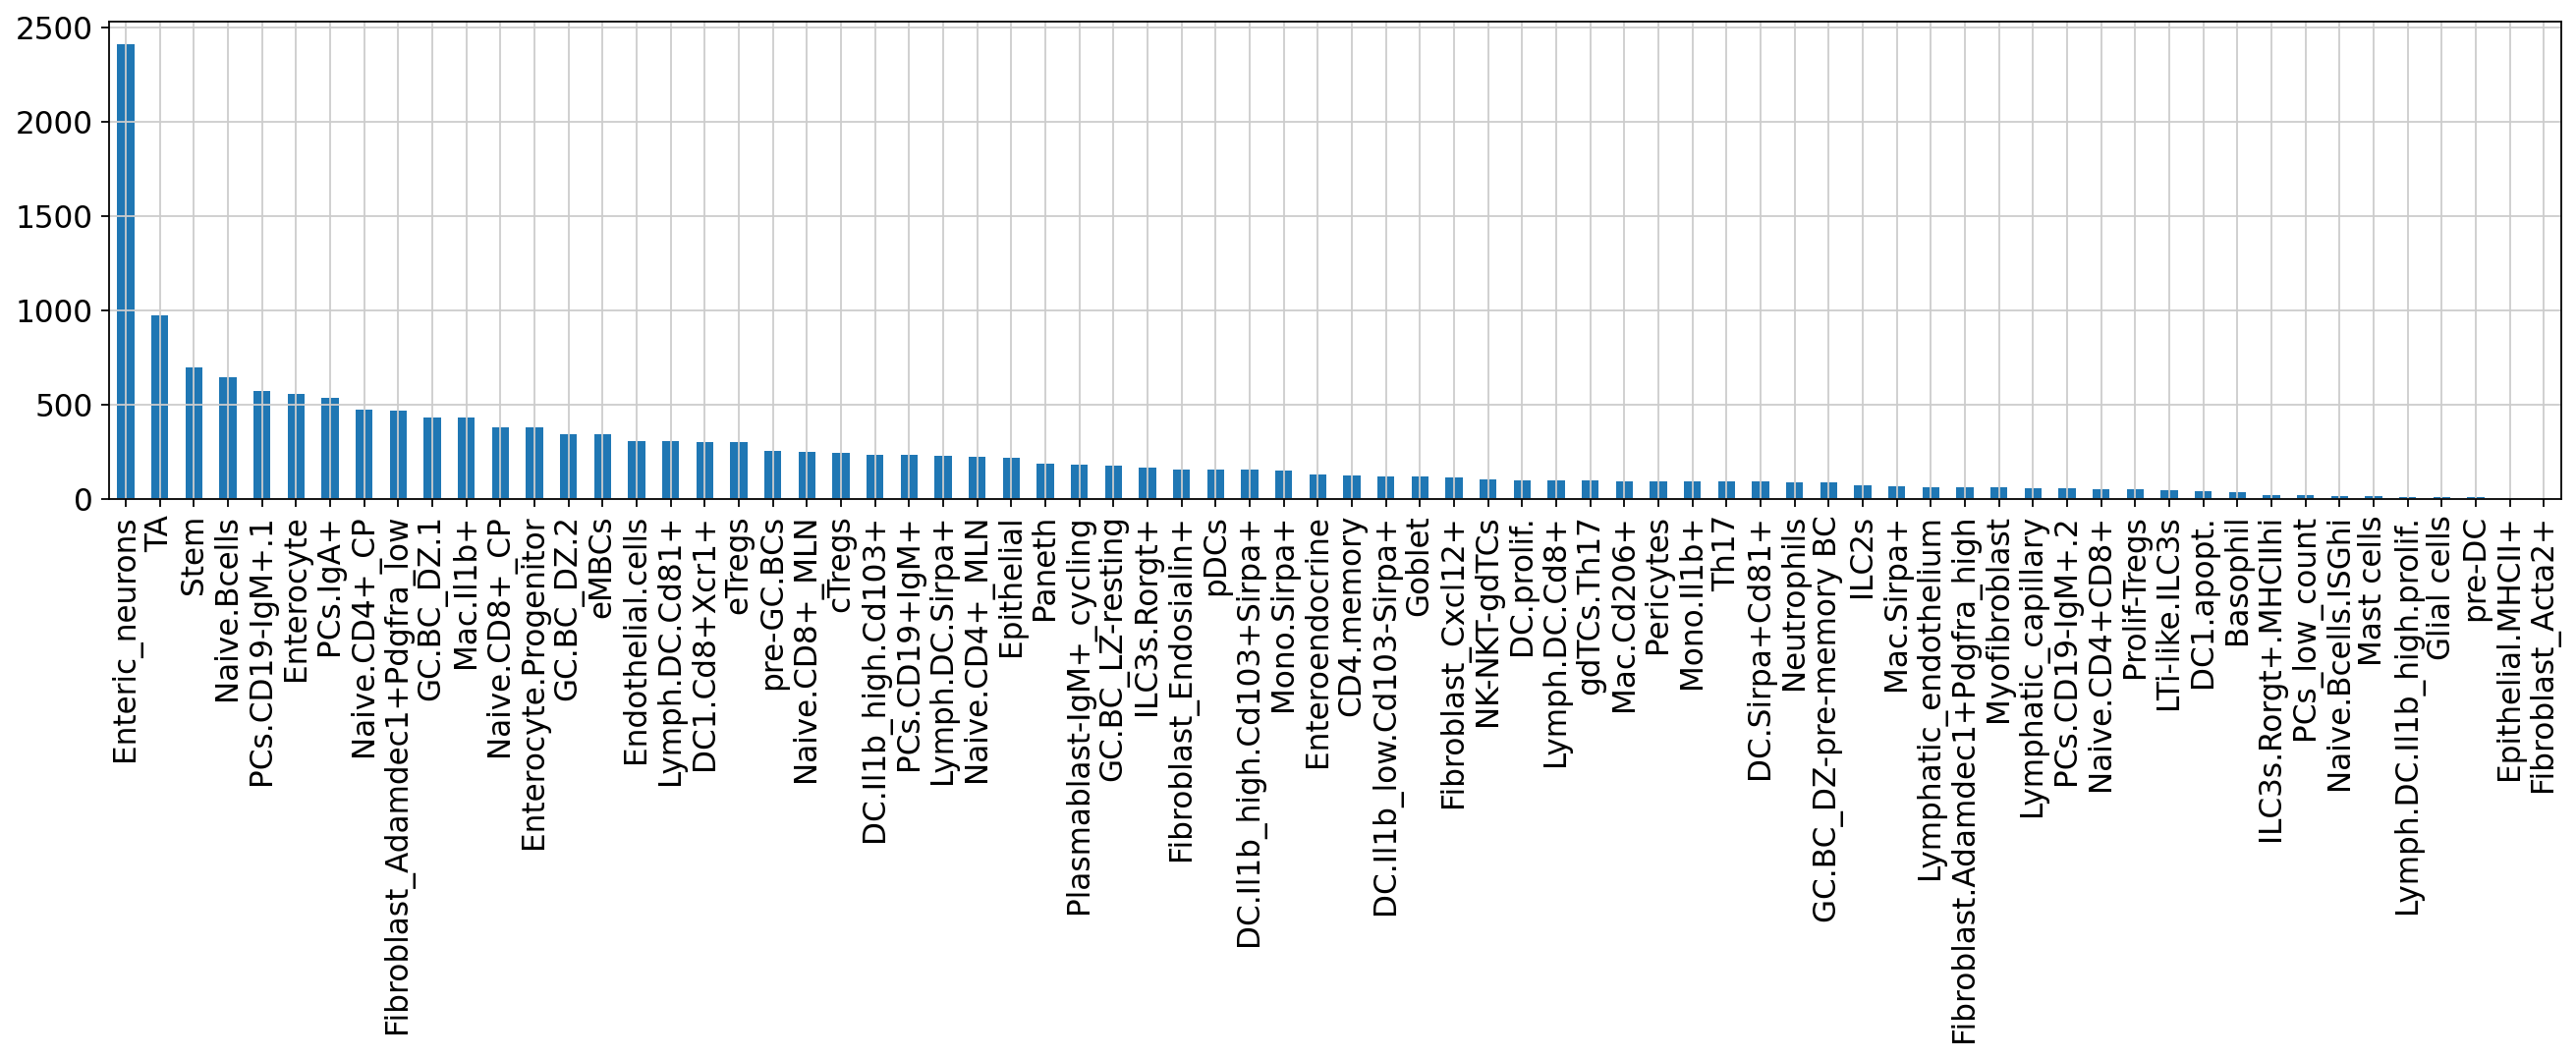

In [189]:
adata.obs['anno'].value_counts().plot(kind='bar', figsize=(20,4))

In [188]:
adata.obs["original_annotation"]

AAACCTGAGCCCAATT-1-0                                               GC.BC_LZ-resting_MLN
AAACCTGAGCGTTGCC-1-0                                                Lymph.DC.Sirpa+_MLN
AAACCTGAGGTGATTA-1-0                                                PCs.CD19-IgM+.2_MLN
AAACCTGCAACGATGG-1-0                                                         cTregs_MLN
AAACCTGCATGGTTGT-1-0                                                  PCs.CD19+IgM+_MLN
                                                                           ...         
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                              Enterocyte.prog
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                                 Stem
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                              Enterocyte.prog
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyte.prog-Biton2018         Enterocyte.prog
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine-Biton2018                          Stem
Name: original_annotation, Lengt

In [193]:
cells_remove=['DC1.apopt.','PCs_low_count','pre-DC']

In [194]:
adata_f=adata[~adata.obs["anno"].isin(cells_remove)]

In [195]:
adata_f

View of AnnData object with n_obs × n_vars = 16450 × 13607
    obs: 'original_annotation', 'anno', 'Dataset', 'sample_name', 'batch', 'tech'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0'
    uns: 'Dataset_colors', 'neighbors_scvi', 'umap', 'anno_colors'
    obsm: 'X_mde', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'neighbors_scvi_connectivities', 'neighbors_scvi_distances'

In [196]:
def label_harm (row):

    if row['anno'] in [ 'Naive.CD4+_CP','Naive.CD4+_MLN']:
        return 'Naive.CD4+TCs'
    if row['anno'] in ['Naive.CD8+_CP', 'Naive.CD8+_MLN']:
        return 'Naive.CD8+TCs'
    if row['anno'] in ["PCs.CD19-IgM+.1", 'PCs.CD19-IgM+.2',"PCs.CD19+IgM+"]:
        return 'PCs.IgM+'
    if row['anno'] in ['GC.BC_DZ.1','GC.BC_DZ.2','GC.BC_LZ','GC.BC_LZ-resting']:
        return 'GC_B.cell'
    else :
        return row['anno']


In [197]:
adata_f.obs['annot_harm'] = adata_f.obs.apply(lambda row: label_harm (row), axis=1)

<AxesSubplot:>

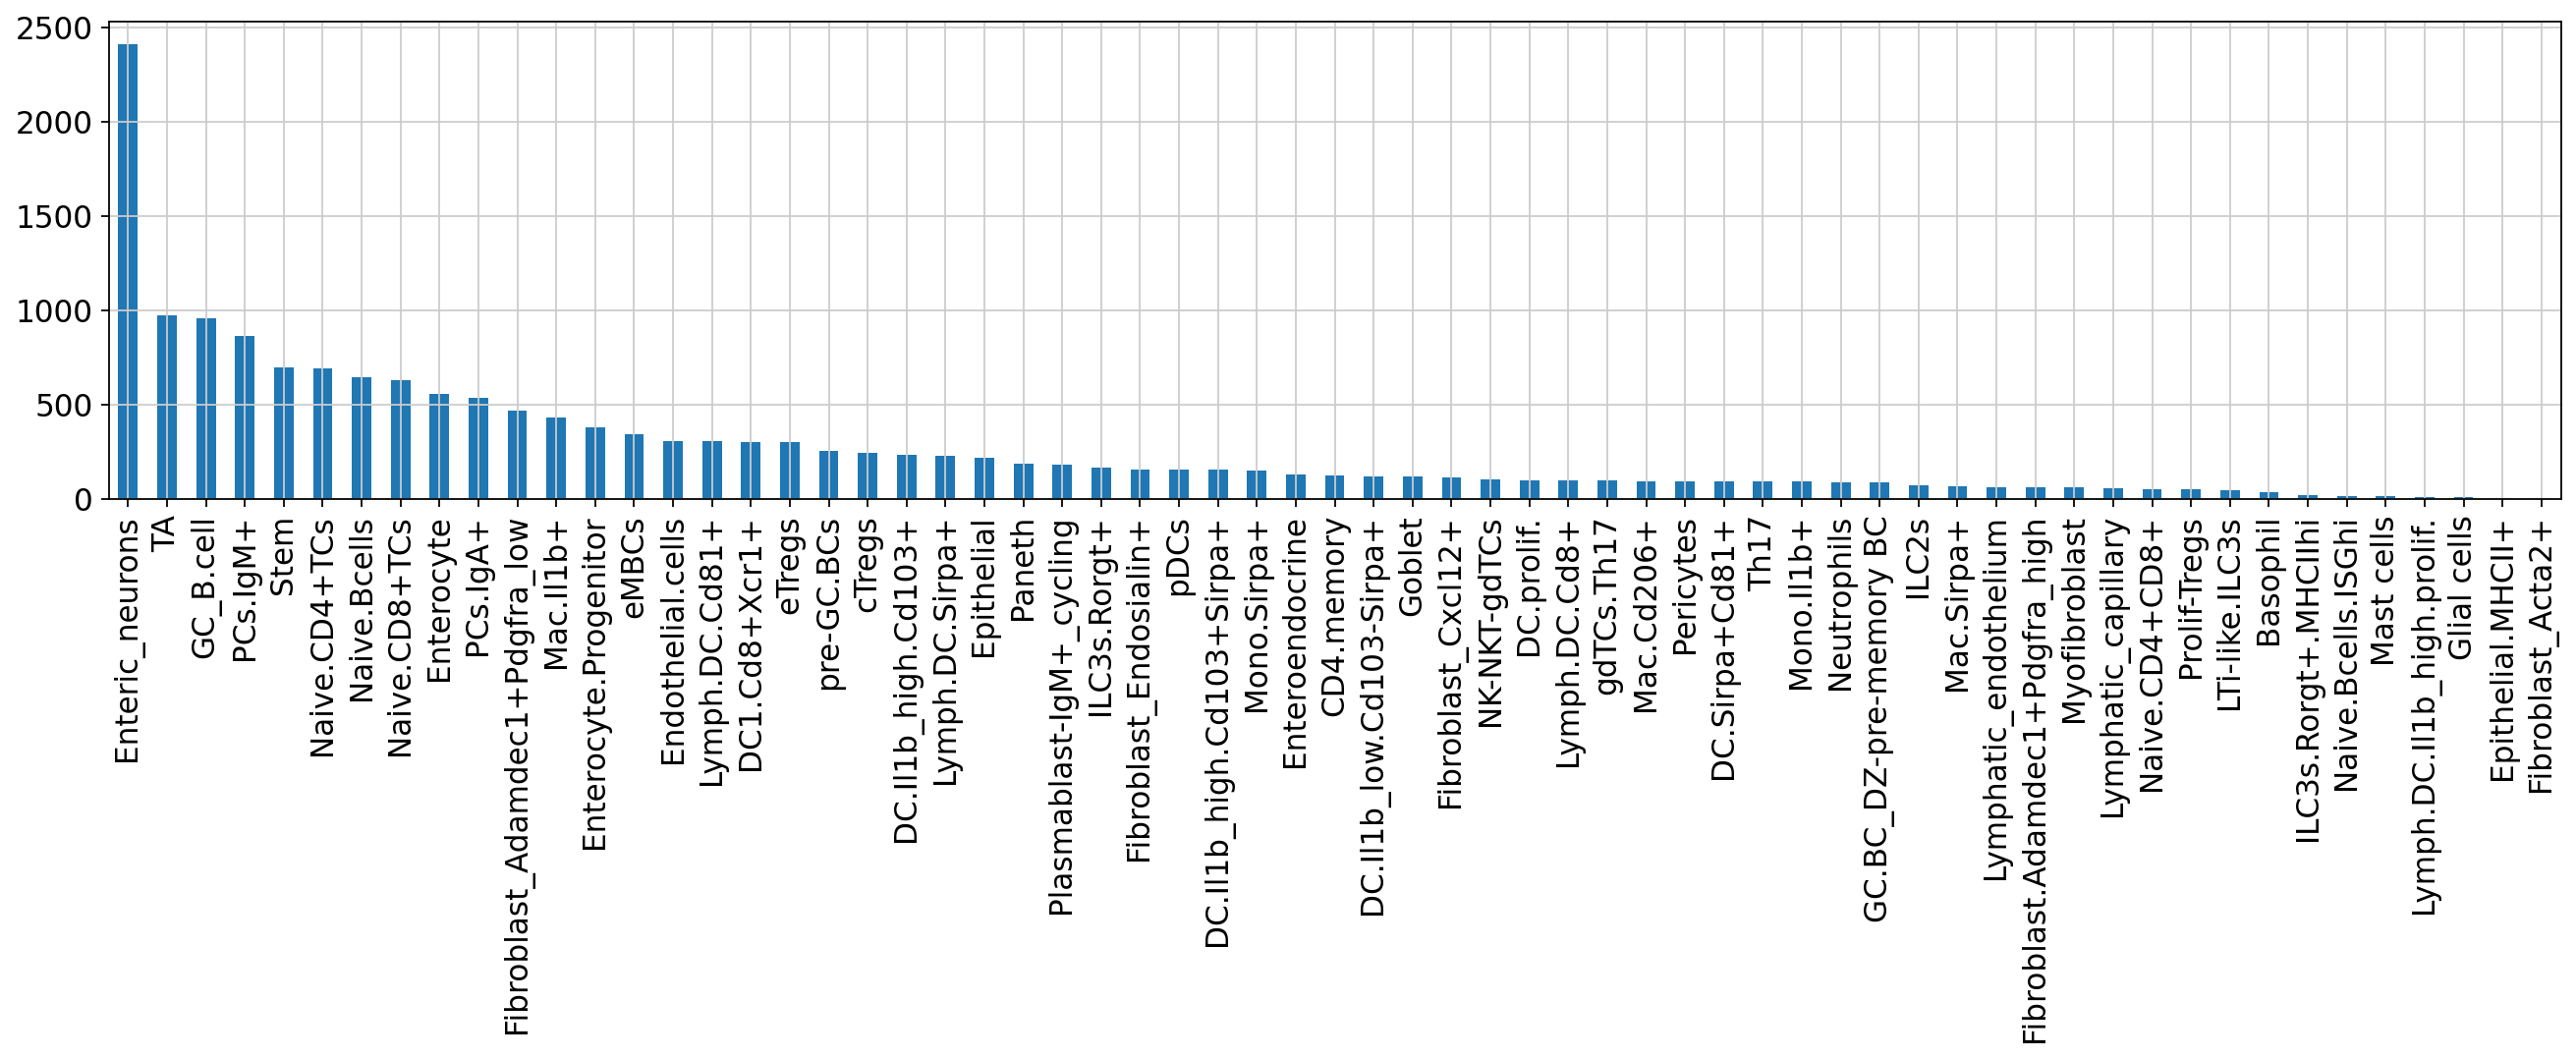

In [198]:
adata_f.obs['annot_harm'].value_counts().plot(kind='bar', figsize=(20,4))

In [199]:
adata=adata_f.copy()

In [201]:
df

annot_counts           harmonized_annot   Dataset
Basophil                             38                   Basophil    Xu2019
CD4.memory                          124                 CD4.memory  NicheSeq
DC1.Cd8+Xcr1+                       304              DC1.Cd8+Xcr1+  NicheSeq
DC.Il1b_high.Cd103+                 234        DC.Il1b_high.Cd103+  NicheSeq
DC.Il1b_high.Cd103+Sirpa+           154  DC.Il1b_high.Cd103+Sirpa+  NicheSeq
...                                 ...                        ...       ...
eMBCs                               345                      eMBCs  NicheSeq
eTregs                              302                     eTregs  NicheSeq
gdTCs.Th17                           97                 gdTCs.Th17  NicheSeq
pDCs                                155                       pDCs  NicheSeq
pre-GC.BCs                          257                 pre-GC.BCs  NicheSeq

[69 rows x 3 columns]

In [202]:
adata.obs

original_annotation  \
AAACCTGAGCCCAATT-1-0                                GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                                 Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                                 PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                                          cTregs_MLN   
AAACCTGCATGGTTGT-1-0                                   PCs.CD19+IgM+_MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                  Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...       Enterocyte.prog   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                  Stem   

                                                                     anno  \
AAACCTGAGCCCAATT-1-0                                     GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                                      Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                                      PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                                               cTregs   
AAACCTGCATGGTTGT-1-0                                        PCs.CD19+IgM+   
...                                                                   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                   Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Enterocyte.Progenitor   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                   Stem   

                                                      Dataset  \
AAACCTGAGCCCAATT-1-0                                 NicheSeq   
AAACCTGAGCGTTGCC-1-0                                 NicheSeq   
AAACCTGAGGTGATTA-1-0                                 NicheSeq   
AAACCTGCAACGATGG-1-0                                 NicheSeq   
AAACCTGCATGGTTGT-1-0                                 NicheSeq   
...                                                       ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  Biton2018   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Biton2018   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  Biton2018   

                                                             sample_name  \
AAACCTGAGCCCAATT-1-0                                                 MLN   
AAACCTGAGCGTTGCC-1-0                                                 MLN   
AAACCTGAGGTGATTA-1-0                                                 MLN   
AAACCTGCAACGATGG-1-0                                                 MLN   
AAACCTGCATGGTTGT-1-0                                                 MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  MHCII_Flox_Control_3   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  MHCII_Flox_Control_3   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  MHCII_Flox_Control_5   

                                                   batch  tech  \
AAACCTGAGCCCAATT-1-0                                   0  5GEX   
AAACCTGAGCGTTGCC-1-0                                   0  5GEX   
AAACCTGAGGTGATTA-1-0                                   0  5GEX   
AAACCTGCAACGATGG-1-0                                   0  5GEX   
AAACCTGCATGGTTGT-1-0                                   0  5GEX   
...                                                  ...   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018             1  3

In [203]:
df2=adata.obs.groupby(["annot_harm","Dataset"]).size().reset_index()
df2.rename(columns={0: 'freq'}, inplace=True)

In [204]:
df2_wide=pd.pivot_table(df2, values="freq", index='annot_harm', columns="Dataset")

In [99]:
#df2_wide.to_csv('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/harmonized_labels_perDataset.csv')

In [210]:
df2_wide.head(30)

Dataset                          Biton2018  Drokhlyansky2020  NicheSeq  Xu2019
annot_harm                                                                    
Basophil                                 0                 0         0      38
CD4.memory                               0                 0       124       0
DC.Il1b_high.Cd103+                      0                 0       234       0
DC.Il1b_high.Cd103+Sirpa+                0                 0       154       0
DC.Il1b_low.Cd103-Sirpa+                 0                 0       122       0
DC.Sirpa+Cd81+                           0                 0        91       0
DC.prolif.                               0                 0       101       0
DC1.Cd8+Xcr1+                            0                 0       304       0
Endothelial.cells                        0                 0       309       0
Enteric_neurons                          0              2411         0       0
Enterocyte                             557                 0         0       0
Enterocyte.Progenitor                  379                 0         0       0
Enteroendocrine                        132                 0         0       0
Epithelial                             199                 0        18       0
Epithelial.MHCII+                        0                 0         7       0
Fibroblast.Adamdec1+Pdgfra_high          0                 0        62       0
Fibroblast_Acta2+                        0                 0         6       0
Fibroblast_Adamdec1+Pdgfra_low           0                 0       466       0
Fibroblast_Cxcl12+                       0                 0       113       0
Fibroblast_Endosialin+                   0                 0       158       0
GC.BC_DZ-pre-memory BC                   0                 0        87       0
GC_B.cell                                0                 0       958       0
Glial cells                              0                 0        10       0
Goblet                                 121                 0         0       0
ILC2s                                    0                 0        74       0
ILC3s.Rorgt+                             0                 0       167       0
ILC3s.Rorgt+.MHCIIhi                     0                 0        23       0
LTi-like.ILC3s                           0                 0        45       0
Lymph.DC.Cd8+                            0                 0        98       0
Lymph.DC.Cd81+                           0                 0       308       0

In [212]:
adata[adata.obs['annot_harm'].map(adata.obs['annot_harm'].value_counts())<30].obs.value_counts()

original_annotation             anno                        Dataset   sample_name  batch  tech  annot_harm                
ILC3s.Rorgt+.MHCIIhi_MLN        ILC3s.Rorgt+.MHCIIhi        NicheSeq  MLN          0      5GEX  ILC3s.Rorgt+.MHCIIhi          18
Lymph.DC.Il1b_high.prolif._MLN  Lymph.DC.Il1b_high.prolif.  NicheSeq  MLN          0      5GEX  Lymph.DC.Il1b_high.prolif.    11
Naive.Bcells.ISGhi_MLN          Naive.Bcells.ISGhi          NicheSeq  MLN          0      5GEX  Naive.Bcells.ISGhi            11
Glial cells_LP                  Glial cells                 NicheSeq  LP           0      5GEX  Glial cells                   10
Epithelial.MHCII+_MLN           Epithelial.MHCII+           NicheSeq  MLN          0      5GEX  Epithelial.MHCII+              7
Mast cells_LP                   Mast cells                  NicheSeq  LP           0      5GEX  Mast cells                     7
Fibroblast_Acta2+_CP            Fibroblast_Acta2+           NicheSeq  CP           0      5GEX  Fibrobl

In [26]:
#a=adata_ori[adata_ori.obs['anno']=='M.cell.Progenitor.1']# Enterocyte progenitor

In [27]:
#a.obs

original_annotation  \
B5_AAAGCCTGGAGATA_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AAAGTTTGTCTTTG_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AAATTCGAAATGCC_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AACACGTGAAGTAG_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AACAGCACATCGTG_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
...                                                                 ...   
B7_TTATTCCTGGATCT_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCACCCTGACACT_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCATGTGGGTAGG_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCCAAACCCAATG_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCTTACTATTTCC_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   

                                                                   anno  \
B5_AAAGCCTGGAGATA_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AAAGTTTGTCTTTG_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AAATTCGAAATGCC_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AACACGTGAAGTAG_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
B5_AACAGCACATCGTG_RANKL.Day3_M.cell.Progenitor....  M.cell.Progenitor.1   
...                                                                 ...   
B7_TTATTCCTGGATCT_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCACCCTGACACT_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCATGTGGGTAGG_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCCAAACCCAATG_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   
B7_TTCTTACTATTTCC_RANKL.Day6_M.cell.Progenitor....  M.cell.Progenitor.1   

                                                      Dataset batch  
B5_AAAGCCTGGAGATA_RANKL.Day3_M.cell.Progenitor....  Haber2017     1  
B5_AAAGTTTGTCTTTG_RANKL.Day3_M.cell.Progenitor....  Haber2017     1  
B5_AAATTCGAAATGCC_RANKL.Day3_M.cell.Progenitor....  Haber2017     1  
B5_AACACGTGAAGTAG_RANKL.Day3_M.cell.Progenitor....  Haber2017     1  
B5_AACAGCACATCGTG_RANKL.Day3_M.cell.Progenitor....  Haber2017     1  
...                                                       ...   ...  
B7_TTATTCCTGGATCT_RANKL.Day6_M.cell.Progenitor....  Haber2017     1  
B7_TTCACCCTGACACT_RANKL.Day6_M.cell.Progenitor....  Haber2017     1  
B7_TTCATGTGGGTAGG_RANKL.Day6_M.cell.Progenitor....  Haber2017     1  
B7_TTCCAAACCCAATG_RANKL.Day6_M.cell.Progenitor....  Haber2017     1  
B7_TTCTTACTATTTCC_RANKL.Day6_M.cell.Progenitor....  Haber2017     1  

[492 rows x 4 columns]

In [214]:
annot=Counter(adata.obs['annot_harm'])

In [216]:
len(annot)

63

In [215]:
sorted(annot.items())

[('Basophil', 38),
 ('CD4.memory', 124),
 ('DC.Il1b_high.Cd103+', 234),
 ('DC.Il1b_high.Cd103+Sirpa+', 154),
 ('DC.Il1b_low.Cd103-Sirpa+', 122),
 ('DC.Sirpa+Cd81+', 91),
 ('DC.prolif.', 101),
 ('DC1.Cd8+Xcr1+', 304),
 ('Endothelial.cells', 309),
 ('Enteric_neurons', 2411),
 ('Enterocyte', 557),
 ('Enterocyte.Progenitor', 379),
 ('Enteroendocrine', 132),
 ('Epithelial', 217),
 ('Epithelial.MHCII+', 7),
 ('Fibroblast.Adamdec1+Pdgfra_high', 62),
 ('Fibroblast_Acta2+', 6),
 ('Fibroblast_Adamdec1+Pdgfra_low', 466),
 ('Fibroblast_Cxcl12+', 113),
 ('Fibroblast_Endosialin+', 158),
 ('GC.BC_DZ-pre-memory BC', 87),
 ('GC_B.cell', 958),
 ('Glial cells', 10),
 ('Goblet', 121),
 ('ILC2s', 74),
 ('ILC3s.Rorgt+', 167),
 ('ILC3s.Rorgt+.MHCIIhi', 23),
 ('LTi-like.ILC3s', 45),
 ('Lymph.DC.Cd8+', 98),
 ('Lymph.DC.Cd81+', 308),
 ('Lymph.DC.Il1b_high.prolif.', 11),
 ('Lymph.DC.Sirpa+', 230),
 ('Lymphatic_capillary', 59),
 ('Lymphatic_endothelium', 64),
 ('Mac.Cd206+', 93),
 ('Mac.Il1b+', 431),
 ('Mac.Sirpa

<AxesSubplot:>

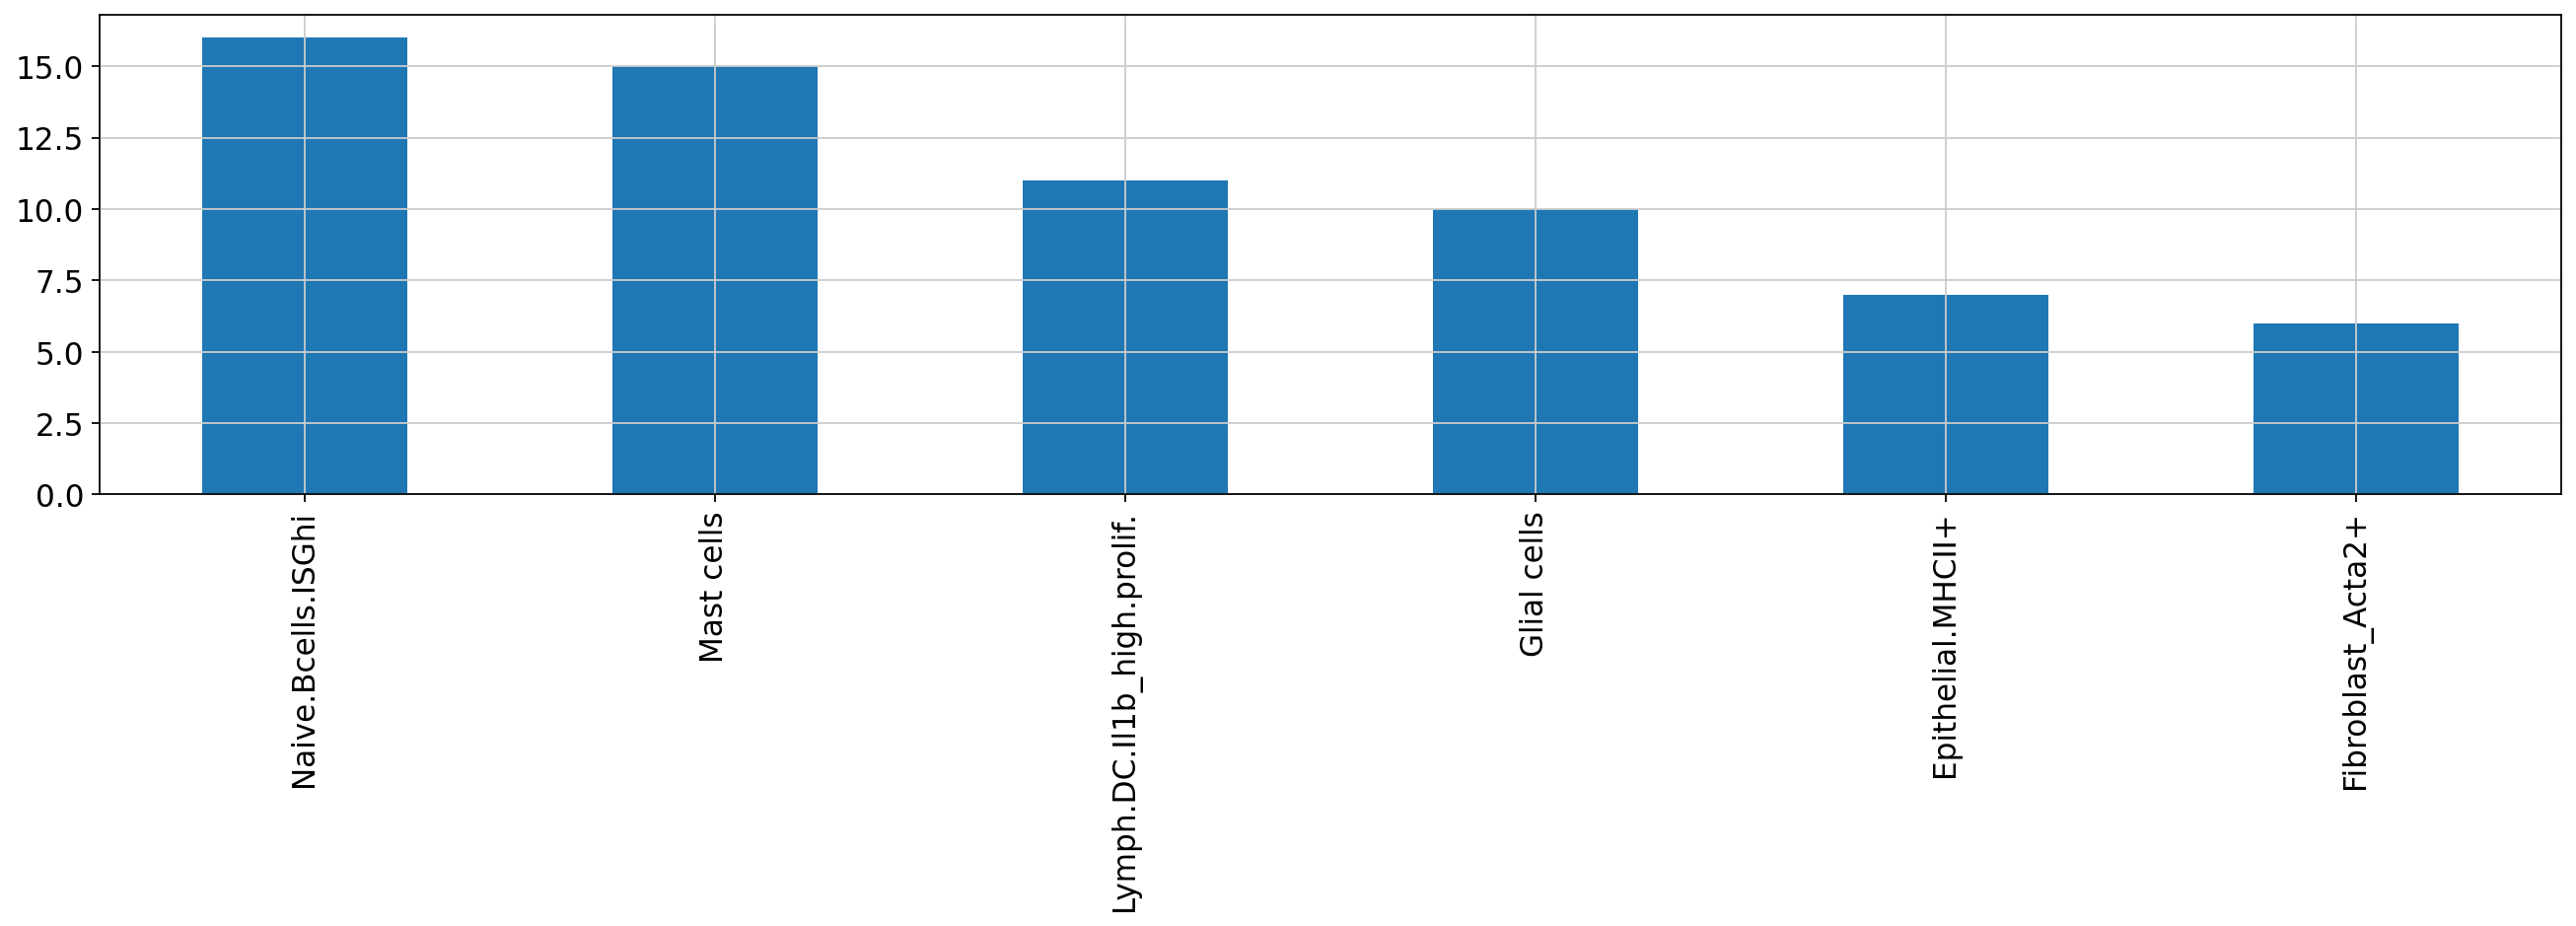

In [219]:
adata[adata.obs['annot_harm'].map(adata.obs['annot_harm'].value_counts())<21].obs['annot_harm'].value_counts().plot(kind='bar', figsize=(20,4))

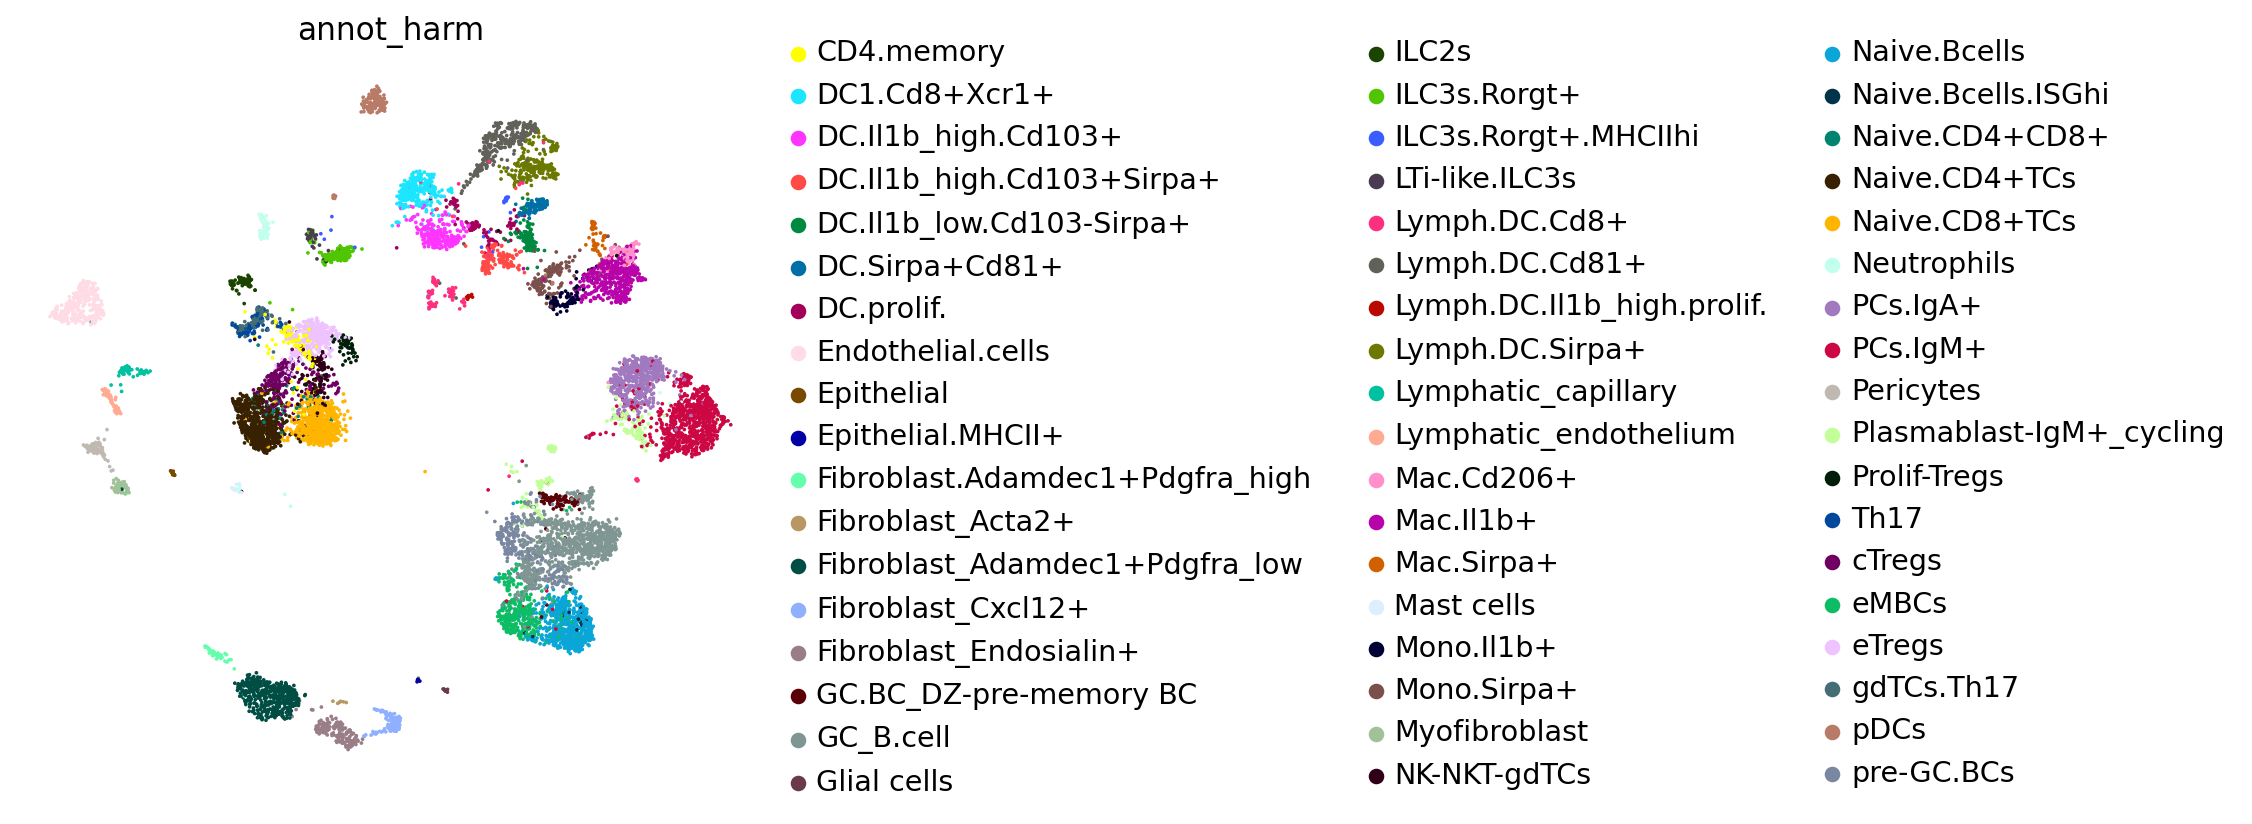

In [229]:
sc.pl.umap(adata[adata.obs.Dataset == 'NicheSeq'], color=["annot_harm"], frameon=False, palette=sc.pl.palettes.godsnot_102)

In [230]:
adata

AnnData object with n_obs × n_vars = 16450 × 13607
    obs: 'original_annotation', 'anno', 'Dataset', 'sample_name', 'batch', 'tech', 'annot_harm', 'mouseGut_predicted_labels', 'mouseGut_over_clustering', 'mouseGut_majority_voting', 'mouseGut_conf_score'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0'
    uns: 'Dataset_colors', 'neighbors_scvi', 'umap', 'anno_colors', 'log1p', 'neighbors', 'leiden', 'mouseGut_majority_voting_colors'
    obsm: 'X_mde', 'X_scVI', 'X_umap', 'X_pca'
    layers: 'counts'
    obsp: 'neighbors_scvi_connectivities', 'neighbors_scvi_distances', 'connectivities', 'distances'

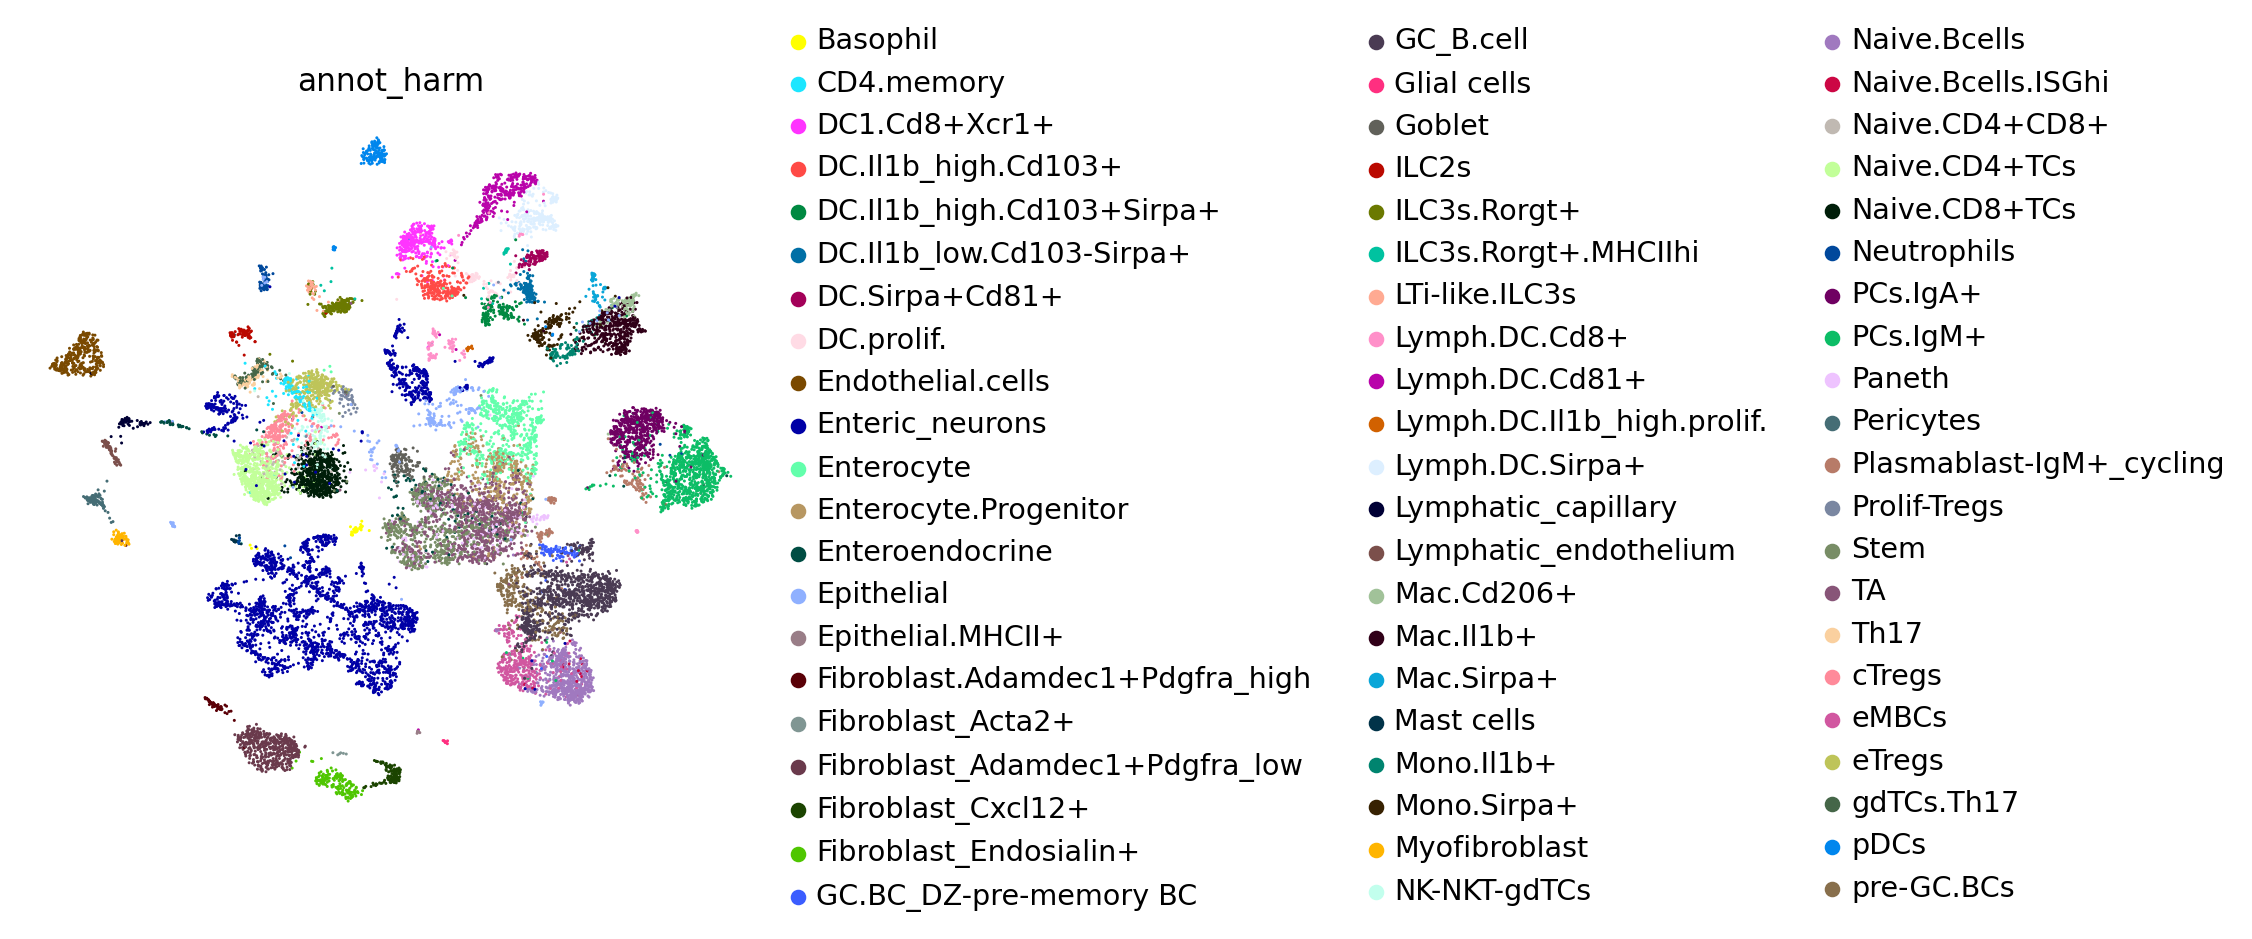

In [231]:
sc.set_figure_params(figsize=(6,6))
sc.pl.umap(adata, color=['annot_harm'], frameon=False, palette=sc.pl.palettes.godsnot_102)

In [289]:
def def_lineage (row):
    if row['annot_harm'] in ['Basophil','Neutrophils']:
            return 'Granulocytes'
    if row['annot_harm'] in ['Mast cells']:
            return 'Mast cells'
    if row['annot_harm'] in ['Endothelial.cells','Lymphatic_endothelium','Lymphatic_capillary', 'Pericytes']:
            return 'Endothelial'
    if row['annot_harm'] in ['Enteric_neurons', 'Glial cells']:
            return 'Neural'
    if row['annot_harm'] in ['Enterocyte','Enterocyte.Progenitor','Enteroendocrine', 'Goblet','Paneth','Epithelial','Epithelial.MHCII+','Stem', 'TA']:
            return 'Epithelial'
    if row['annot_harm'] in ['Fibroblast.Adamdec1+Pdgfra_high','Fibroblast_Acta2+','Fibroblast_Adamdec1+Pdgfra_low','Fibroblast_Cxcl12+',
                             'Fibroblast_Endosialin+','Myofibroblast']:
            return "Stromal"
    if row['annot_harm'] in ['GC.BC_DZ-pre-memory BC' ,'GC_B.cell','Naive.Bcells','Naive.Bcells.ISGhi','pre-GC.BCs', 'eMBCs', 'PCs.IgA+','PCs.IgM+', 'Plasmablast-IgM+_cycling']:
            return "Bcells-PlasmaCells"
    if row['annot_harm'] in ['Naive.CD4+CD8+','Naive.CD4+TCs', 'Naive.CD8+TCs', 'ILC2s','ILC3s.Rorgt+','ILC3s.Rorgt+.MHCIIhi','LTi-like.ILC3s',
                            'cTregs','eTregs','Prolif-Tregs','NK-NKT-gdTCs', 'CD4.memory','Th17', 'gdTCs.Th17']:
            return "Tcells-ILCs"
    if row['annot_harm'] in ['Lymph.DC.Cd8+','Lymph.DC.Cd81+', 'Lymph.DC.Il1b_high.prolif.', 'Lymph.DC.Sirpa+',
                'DC.Il1b_high.Cd103+','DC.Il1b_high.Cd103+Sirpa+','DC.Il1b_low.Cd103-Sirpa+','DC.Sirpa+Cd81+','DC.prolif.','DC1.Cd8+Xcr1+','pDCs',
                'Mac.Cd206+','Mac.Il1b+', 'Mac.Sirpa+', 'Mono.Il1b+','Mono.Sirpa+']:
            return "Myeloid_cells"

In [290]:
adata.obs['lineage'] = adata.obs.apply(lambda row: def_lineage (row), axis=1)

... storing 'lineage' as categorical


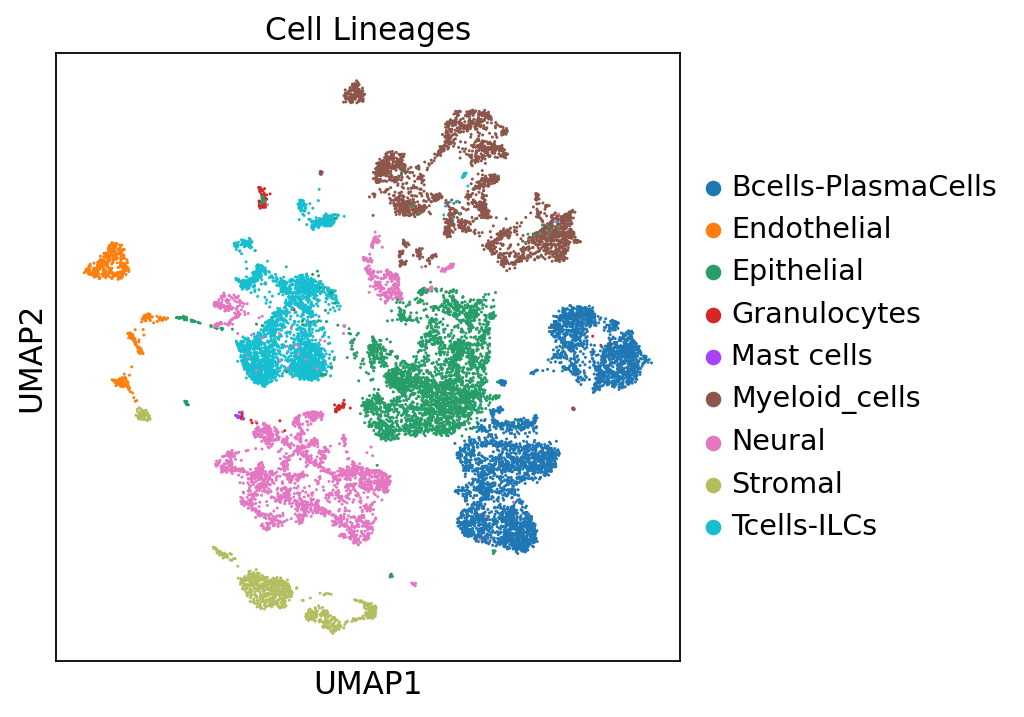

In [291]:
sc.set_figure_params(figsize=(5,5))
sc.pl.umap(adata, color=['lineage'], frameon=True, palette=sc.pl.palettes.vega_20_scanpy, title="Cell Lineages")

In [294]:
adata.write("/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/scRNAseq_reference_for_C2L/Reference_object_C2L_rawCounts_SCVI_woVDJ_3Dts_inner_annot.h5ad")

## For Extended data figure

In [24]:
adata=sc.read('/nfs/team205/rb29/mice_gutTCRtg_project/Src/Mice-gut.TCRtg/new_analysis/Visium/h5ad_files/scRNAseq_reference_for_C2L/Reference_object_C2L_rawCounts_SCVI_woVDJ_3Dts_inner_annot.h5ad')

In [25]:
adata

AnnData object with n_obs × n_vars = 16450 × 13607
    obs: 'original_annotation', 'anno', 'Dataset', 'sample_name', 'batch', 'tech', 'annot_harm', 'mouseGut_predicted_labels', 'mouseGut_over_clustering', 'mouseGut_majority_voting', 'mouseGut_conf_score', 'res0.2', 'res0.3', 'res0.4', 'lineage'
    var: 'gene_ids-0', 'feature_types-0', 'genome-0', 'n_cells-0'
    uns: 'Dataset_colors', 'anno_colors', 'annot_harm_colors', 'leiden', 'lineage_colors', 'log1p', 'mouseGut_majority_voting_colors', 'neighbors', 'neighbors_scvi', 'rank_genes_groups', 'res0.2_colors', 'res0.3_colors', 'res0.4_colors', 'umap'
    obsm: 'X_mde', 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances', 'neighbors_scvi_connectivities', 'neighbors_scvi_distances'

In [28]:
adata.obs

original_annotation  \
AAACCTGAGCCCAATT-1-0                                GC.BC_LZ-resting_MLN   
AAACCTGAGCGTTGCC-1-0                                 Lymph.DC.Sirpa+_MLN   
AAACCTGAGGTGATTA-1-0                                 PCs.CD19-IgM+.2_MLN   
AAACCTGCAACGATGG-1-0                                          cTregs_MLN   
AAACCTGCATGGTTGT-1-0                                   PCs.CD19+IgM+_MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                  Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018               Enterocyte.prog   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...       Enterocyte.prog   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                  Stem   

                                                                     anno  \
AAACCTGAGCCCAATT-1-0                                     GC.BC_LZ-resting   
AAACCTGAGCGTTGCC-1-0                                      Lymph.DC.Sirpa+   
AAACCTGAGGTGATTA-1-0                                      PCs.CD19-IgM+.2   
AAACCTGCAACGATGG-1-0                                               cTregs   
AAACCTGCATGGTTGT-1-0                                        PCs.CD19+IgM+   
...                                                                   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018                   Stem   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Enterocyte.Progenitor   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Enterocyte.Progenitor   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...                   Stem   

                                                      Dataset  \
AAACCTGAGCCCAATT-1-0                                 NicheSeq   
AAACCTGAGCGTTGCC-1-0                                 NicheSeq   
AAACCTGAGGTGATTA-1-0                                 NicheSeq   
AAACCTGCAACGATGG-1-0                                 NicheSeq   
AAACCTGCATGGTTGT-1-0                                 NicheSeq   
...                                                       ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  Biton2018   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018          Biton2018   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  Biton2018   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  Biton2018   

                                                             sample_name  \
AAACCTGAGCCCAATT-1-0                                                 MLN   
AAACCTGAGCGTTGCC-1-0                                                 MLN   
AAACCTGAGGTGATTA-1-0                                                 MLN   
AAACCTGCAACGATGG-1-0                                                 MLN   
AAACCTGCATGGTTGT-1-0                                                 MLN   
...                                                                  ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGGTTTCCAAATGC_MHCII_Flox_Control_3_TA-Biton2018  MHCII_Flox_Control_3   
TTTGTCAAGCGCTCCA_MHCII_dGut_3_TA-Biton2018                  MHCII_dGut_3   
TTTGTCACAAAGCGGT_MHCII_Flox_Control_3_Enterocyt...  MHCII_Flox_Control_3   
TTTGTCACATCCGCGA_MHCII_Flox_Control_5_Endocrine...  MHCII_Flox_Control_5   

                                                   batch  tech  \
AAACCTGAGCCCAATT-1-0                                   0  5GEX   
AAACCTGAGCGTTGCC-1-0                                   0  5GEX   
AAACCTGAGGTGATTA-1-0                                   0  5GEX   
AAACCTGCAACGATGG-1-0                                   0  5GEX   
AAACCTGCATGGTTGT-1-0                                   0  5GEX   
...                                                  ...   ...   
TTTGGTTGTTAAGAAC_MHCII_dGut_3_TA-Biton2018             1  3

In [43]:
import sctk as sk

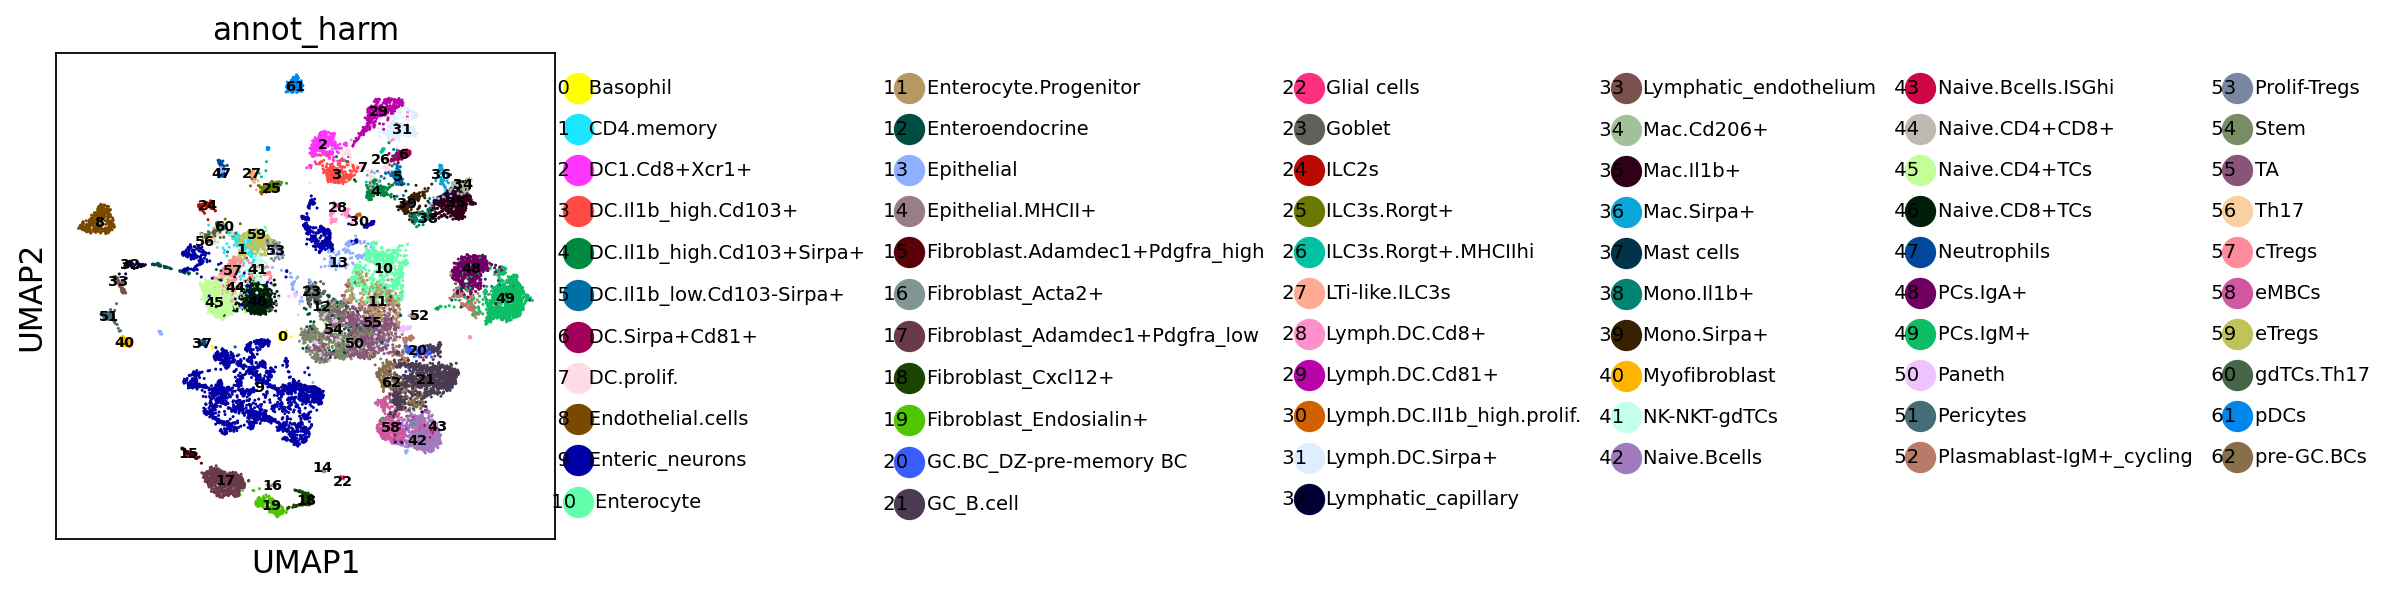

In [46]:
with mpl.rc_context({'figure.figsize': [6, 6],
                     'axes.facecolor': 'white'}):
    sk.plot_embedding(adata, basis="umap", groupby='annot_harm', legend_fontsize=8, save="scRNAseq_ref_cellTypes_sctk.pdf")

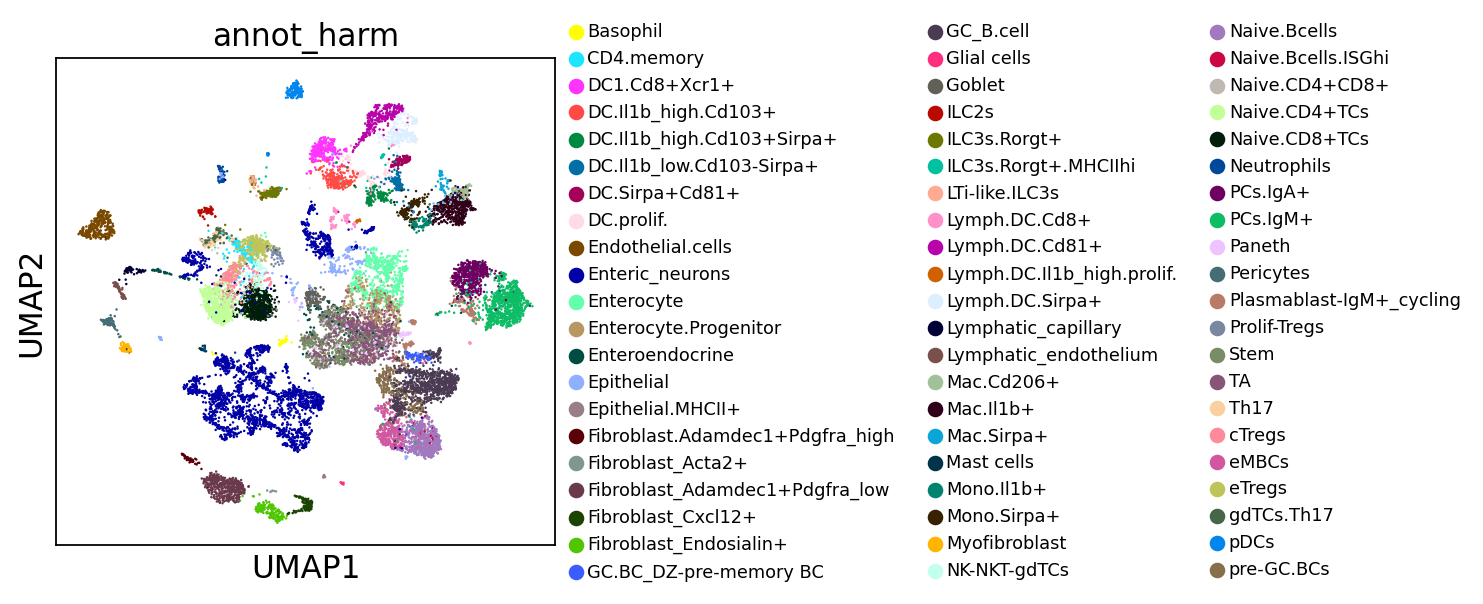

In [42]:
with mpl.rc_context({'figure.figsize': [4, 4],
                     'axes.facecolor': 'white'}):
    sc.pl.umap(adata, color=['annot_harm'], size=5,
              #legend_loc='on data',
               #legend_fontoutline=1,
               legend_fontsize=8, save="scRNAseq_ref_cellTypes.pdf")


In [ ]:
adata.obs

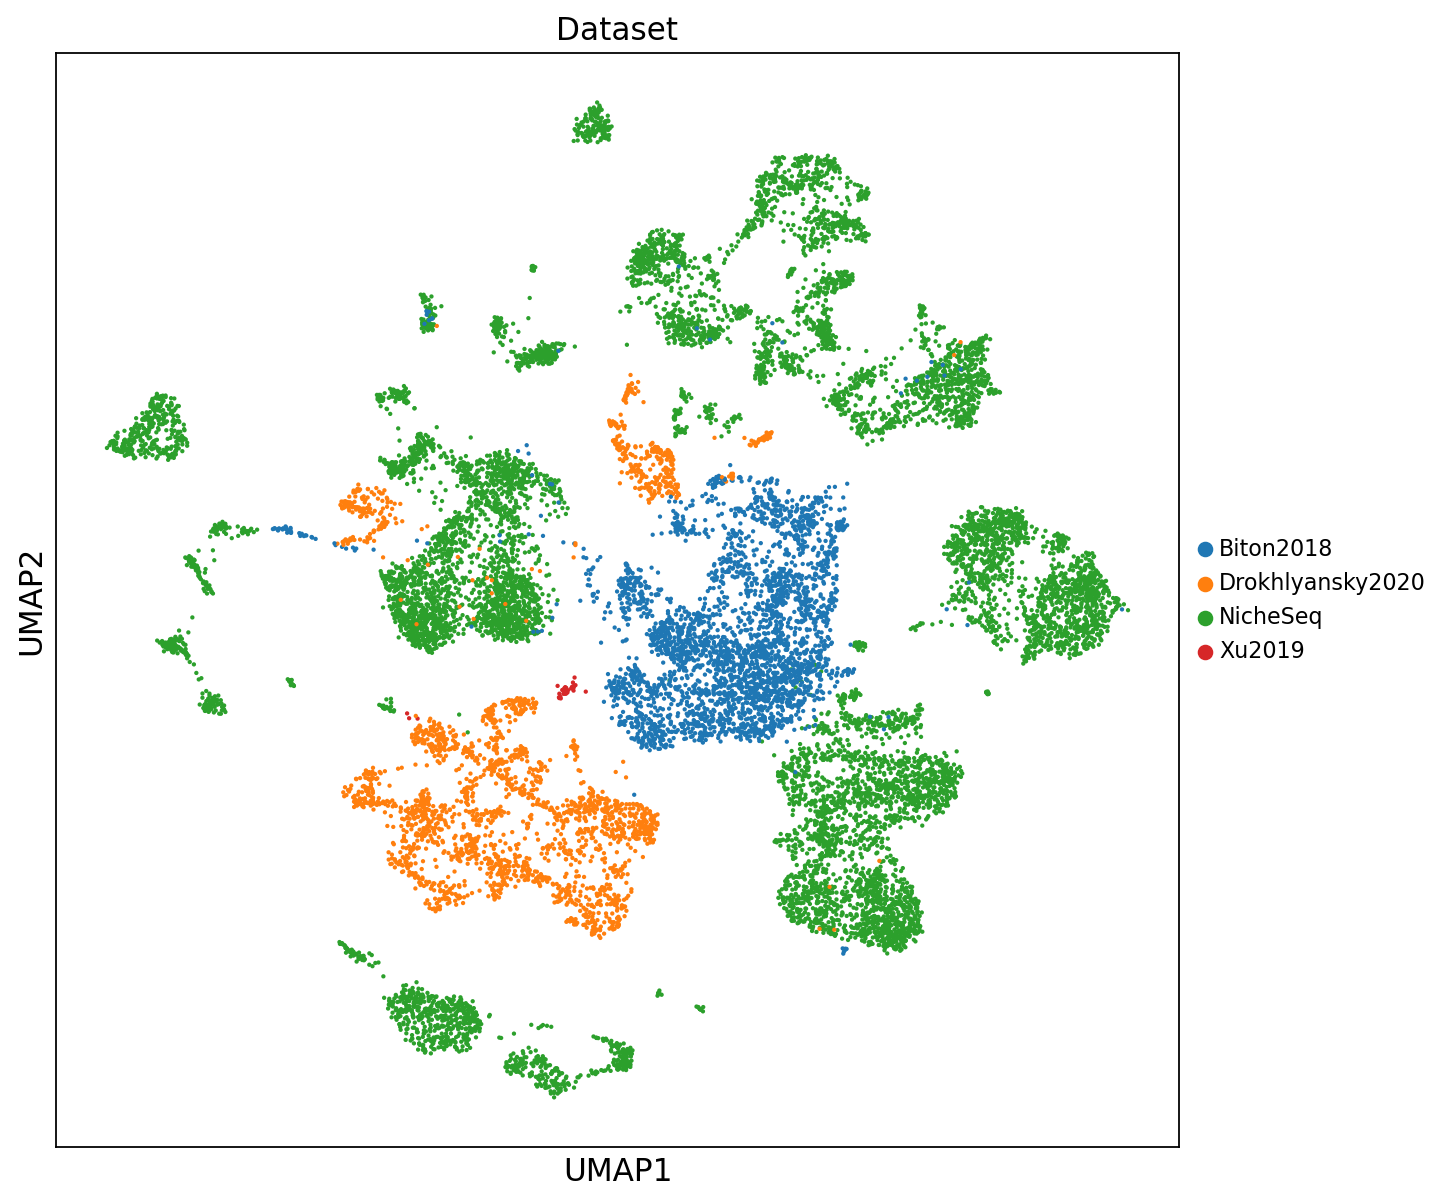

In [34]:
with mpl.rc_context({'figure.figsize': [9, 9],
                     'axes.facecolor': 'white'}):
    sc.pl.umap(adata, color=['Dataset'], size=15, legend_fontsize=10, save="scRNAseq_ref_dataset.pdf")

---